In [ ]:
!pip install ipython-autotime
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import plotly.express as ex
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
%load_ext autotime

time: 371 µs (started: 2024-03-13 14:33:40 +00:00)


In [ ]:
# Mount Drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive
time: 27.5 s (started: 2024-03-13 14:33:49 +00:00)


In [ ]:
import random
random.seed(42)

time: 457 µs (started: 2024-03-13 14:34:21 +00:00)


#Data Cleaning
Dropping columns that have more than 60% missing values

In [ ]:
# Read in Suffolk data
# suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk.csv')
# Drop columns that have more than 60% of missing values
# suf = suf.loc[:, (suf.isin([' ','NULL']) | suf.isnull()).mean() <= .6]
# suf.to_csv('suffolk_sub.csv')
# files.download('suffolk_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 58.3 s (started: 2024-03-07 04:36:52 +00:00)


In [ ]:
# Read in Essex data
# essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex.csv')
# Drop columns that have more than 60% of missing values
# essex = essex.loc[:, (essex.isin([' ','NULL']) | essex.isnull()).mean() <= .6]
# essex = essex.drop_duplicates()
# essex.to_csv('essex_sub.csv')
# !zip -r /content/essex.zip essex/
# files.download('essex.zip')

time: 6min 42s (started: 2024-03-07 12:30:40 +00:00)


In [ ]:
# nor = pd.read_csv('drive/MyDrive/Capstone/Data/norfolk.csv')
# nor = nor.loc[:, (nor.isin([' ','NULL']) | nor.isnull()).mean() <= .6]
# nor = nor.drop_duplicates()
# nor.to_csv('norf_sub.csv')
# files.download('norf_sub.csv')
# !zip -r /content/norfolk.zip norfolk/
# files.download('norfolk.zip')

In [ ]:
#middle = pd.read_csv('drive/MyDrive/Capstone/Data/middlesex_smaller.csv')
#middle = middle.loc[:, (middle.isin([' ','NULL']) | middle.isnull()).mean() <= .6]
#middle = middle.drop_duplicates()
#middle.to_csv('middle_sub.csv')
# !zip -r /content/middle.zip norfolk/
#files.download('middle_sub.csv')

<ipython-input-6-721e86045b69>:1: DtypeWarning: Columns (15,31,33,34,77,1075,1385,1392,1393,1399,1400,1401,1405,1415,1417,1418,1425,1429,1443,1445,1447,1448,1463,1465,1466,1468,1472,1474,1478,1483,1487,1491,1499,1513,1514,1515,1516,1517,1521,1530,1531,1549,1567,1571,1586,1622,1641,1659,1683,1684,1685,1704,1705,1706,1707,1708,1709,1710,1711,1728,1729,1730,1740,1743,1746,1748,1750,1751,1755,1756,1768,1769,1770,1771,1772,1774,1777,1778,1787,1790,1796,1803,1807,1808,1809,1821,1822,1824,1835,1838,1845,1846,1847,1848,1849,1850,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1907,1923,1924,1932,1933,1935,1938,1977,1990,1999,2140,2141,2142,2144,2154,2155,2156,2158,2168,2169,2170,2172,2184,2186,2198,2200,2212,2214,2226,2228,2230,2241,2248,2260,2261,2262,2263,2264,2265,2266,2267,2268,2276,227

time: 13min 9s (started: 2024-03-12 20:38:39 +00:00)


# Read Data
Read in data for analysis

In [ ]:
# Read in Suffolk data
suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk_sub.csv')

<ipython-input-5-fdcd324c2372>:2: DtypeWarning: Columns (19,689,1674,1984,2043,2044,2055,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2503,2516,2626,2627,2628,2639,2650,2661,2672,2730,2767,2804,2841,2878,2915,2952,2989,3016,3017,3018,3023,3029,3039,3040,3044,3060,3061,3062,3067,3073,3080,3084,3088,3100,3103,3232,3314,3375) have mixed types. Specify dtype option on import or set low_memory=False.
  suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk_sub.csv')


time: 35.9 s (started: 2024-03-13 14:34:31 +00:00)


In [ ]:
# Read in Essex data
essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex_sub.csv')

<ipython-input-6-6aa9b39584ba>:2: DtypeWarning: Columns (9,10,11,17,27,28,30,47,57,58,59,65,75,76,78,99,110,190,399,404,410,414,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,501,539,548,549,551,553,554,555,556,557,558,559,585,586,588,590,591,592,593,594,595,596,613,622,623,625,627,628,629,630,631,632,633,659,660,662,664,665,666,667,668,669,670,696,697,699,701,702,703,704,705,706,707,724,733,734,736,738,739,740,741,742,743,744,770,771,773,775,776,777,778,779,780,781,807,808,810,812,813,814,815,816,817,818,837,1337,1341,1348,1355,1358,1369,1380,1419,1439,1462,1470,1471,3231) have mixed types. Specify dtype option on import or set low_memory=False.
  essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex_sub.csv')


time: 1min 33s (started: 2024-03-13 14:35:10 +00:00)


In [ ]:
# Read in Norfolk data
nor = pd.read_csv('drive/MyDrive/Capstone/Data/norf_sub.csv')

<ipython-input-7-20251d9ec523>:2: DtypeWarning: Columns (1347,1352,1547,1554,1569,1679,1690,1701,1712,1734,1759,1760,1761,1796,1797,1798,1833,1834,1835,1870,1871,1872,1907,1908,1909,1944,1945,1946,1981,1982,1983,2018,2019,2020,2046,2048,2049,2050,2051,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2167,2169,2208,2249,2290,2331,2372,3282) have mixed types. Specify dtype option on import or set low_memory=False.
  nor = pd.read_csv('drive/MyDrive/Capstone/Data/norf_sub.csv')


time: 1min 24s (started: 2024-03-13 14:51:03 +00:00)


In [ ]:
# Create one dataset with data from all counties
all = pd.concat([suf, nor, essex])
all = all.loc[:, (all.isin([' ','NULL', 'null', '']) | nor.isnull()).mean() <= .6]

time: 3min 41s (started: 2024-03-13 14:52:27 +00:00)


In [ ]:
all.head() # has 72,461 rows and 4325 columns

Unnamed: 0      zpid      maloneId         city state     homeStatus  \
0           0  59164353  2.001397e+09       Boston    MA           SOLD   
1           1  67398919  2.001523e+09  East Boston    MA           SOLD   
2           2  59111603  1.013195e+09   Dorchester    MA          OTHER   
3           3  63712215  2.001416e+09       Boston    MA  RECENTLY_SOLD   
4           4  59099904  1.002947e+09  Charlestown    MA  RECENTLY_SOLD   

     address_streetAddress address_city address_state  address_zipcode  ...  \
0     100 Fulton St APT 1D       Boston            MA             2109  ...   
1        124 Everett St #2  East Boston            MA             2128  ...   
2             9 Marlin Way   Dorchester            MA             2122  ...   
3  234 Causeway St APT 714       Boston            MA             2114  ...   
4             6 Shipway Pl  Charlestown            MA             2129  ...   

   NFSHDPBottomSlot_messages_0_decisionContext_entryActionLinks_0_leadType  \
0                                                NaN                         
1                                                NaN                         
2                                                NaN                         
3                                                NaN                         
4                                                NaN                         

   NFSHDPBottomSlot_messages_0_decisionContext_entryActionLinks_0_link  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   NFSHDPTopSlot_messages_0_qualifiedTreatments_2_id  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   NFSHDPTopSlot_messages_0_qualifiedTreatments_2_name  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   NFSHDPTopSlot_messages_0_qualifiedTreatments_2_status  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   NFSHDPTopSlot_messages_0_qualifiedTreatments_2_lastModified  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

  NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_id  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_name  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   

time: 28 ms (started: 2024-03-13 15:00:24 +00:00)


Drop nfsdh data and images, since they aren't useful for this analysis

In [ ]:
nfsdh = [col for col in all.columns if 'NFSHDP' in col]
photos = [col for col in all.columns if 'Photos' in col]
top_nav = [col for col in all.columns if 'topnav_json' in col.lower()]
drop_cols = nfsdh + photos + top_nav

time: 3.58 ms (started: 2024-03-13 15:00:28 +00:00)


In [ ]:
all_clean = all.drop(columns=drop_cols, axis=1) # 72,461 rows and 1071 columns

time: 1.48 s (started: 2024-03-13 19:53:40 +00:00)


# Add date information to dataset



In [ ]:
def quarter(x):
    if x in ['01', '02', '03']:
        return 'Q1'
    elif x in ['04', '05', '06']:
        return 'Q2'
    elif x in ['07', '08', '09']:
        return 'Q3'
    elif x in ['10', '11', '12']:
        return 'Q4'

time: 3.71 ms (started: 2024-03-13 15:02:07 +00:00)


In [ ]:
# Save month sold in to variable
all_clean['month'] = all_clean['dateSoldString'].str[5:7]
# Save month year in to variable
all_clean['year'] = all_clean['dateSoldString'].str[0:4]
# Save quarter sold in to variable
all_clean['quarter'] = all_clean['month'].apply(quarter)
# Save year quarter sold in to variable
all_clean['yr-quarter-string'] = all_clean['year'].str[2:4] + '-' + all_clean['quarter']
all_clean['yr-month'] = all_clean['year'].str[2:4] + '-' + all_clean['month']
# Update the 'city' value to 'Wellesley' for those rows
all_clean.loc[all_clean['city'] == 'Wellesley Hills', 'city'] = 'Wellesley'

sorted_df = all_clean.sort_values(['yr-quarter-string'])

time: 1.23 s (started: 2024-03-13 19:53:44 +00:00)


In [ ]:
avg = sorted_df.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()
avg.shape

(1235, 3)

time: 29.9 ms (started: 2024-03-13 23:51:25 +00:00)


In [ ]:
# Save dates as datetime objects, will be useful later on
#all_clean['dateSoldString'] = pd.to_datetime(all_clean['dateSoldString'])
#all_clean['year_q'] = pd.PeriodIndex(all_clean['dateSoldString'], freq='Q')
# Update the 'city' value to 'Wellesley' for those rows
# Get average price by city
avg_price = sorted_df.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()

#indexState = all_clean[all_clean.address_state != 'MA'].index
#df = all_clean.drop(indexState)
#cities_to_keep = all_clean[all_clean['year_q'] == '2020Q4']['city'].unique()
#df_filtered = all_clean[all_clean['address_city'].isin(cities_to_keep)]

time: 30 ms (started: 2024-03-13 23:59:17 +00:00)


In [ ]:
avg_price.shape

(1235, 3)

time: 2.41 ms (started: 2024-03-13 23:59:20 +00:00)


In [ ]:
avg_month = sorted_df.groupby(['yr-month', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()

time: 24.4 ms (started: 2024-03-13 23:59:23 +00:00)


In [ ]:
#sns.lineplot(data=test, x='yr-quarter', y='price', hue='address_city', palette='Pastel1')
fig = ex.line(avg_price, x = 'yr-quarter-string',y='price', color = 'city', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=False)

time: 475 ms (started: 2024-03-13 23:59:26 +00:00)


In [ ]:
sorted_df.value_counts(subset=['county'])

county           
Norfolk County       24313
Essex County         23078
Suffolk County       15311
Middlesex County      9693
Providence County       46
Bristol County           7
Rockingham County        5
Worcester County         3
dtype: int64

time: 16.4 ms (started: 2024-03-13 19:54:35 +00:00)


In [ ]:
avg_price_county = sorted_df.groupby(['yr-quarter-string', 'county'])['lastSoldPrice'].mean().to_frame('price').reset_index()
earliest_quarters = avg_price.groupby('city')[['yr-quarter-string']].min().reset_index()
earliest_quarters.sort_values(['yr-quarter-string'], inplace=True)

time: 45.6 ms (started: 2024-03-13 23:59:32 +00:00)


In [ ]:
fig = ex.histogram(earliest_quarters, x="yr-quarter-string", histfunc='count', labels={'yr-quarter-string': 'Year-Quarter', 'count': 'Number of cities'}, title='Figure 1: Earliest Date Sold')
fig.update_layout(
    title_y=0.85,
    title_x=0.5,
)
fig.show()


time: 54.6 ms (started: 2024-03-14 00:33:11 +00:00)


In [ ]:
last_quarters = avg_price.groupby('city')[['yr-quarter-string']].max().reset_index()
last_quarters.sort_values(['yr-quarter-string'], inplace=True)

time: 17.6 ms (started: 2024-03-13 23:32:41 +00:00)


In [ ]:
fig = ex.histogram(last_quarters, x="yr-quarter-string", histfunc='count', labels={'yr-quarter-string': 'Year-Quarter', 'count': 'Number of cities'}, title='Figure 2: Last Date Sold')
fig.update_layout(
    title_y=0.85,
    title_x=0.5,
)
fig.show()

time: 51.7 ms (started: 2024-03-14 00:33:07 +00:00)


# 21-Q1 will be start date of time-series data

In [ ]:
cities_to_keep = sorted_df[sorted_df['yr-quarter-string'] == '20-Q4']['city'].unique()
len(cities_to_keep)

39

time: 80.2 ms (started: 2024-03-14 00:00:02 +00:00)


In [ ]:
cities_to_keep

array(['Dunstable', 'Plainville', 'Lowell', 'Arlington', 'Boston',
       'Roxbury', 'Sharon', 'Needham', 'North Reading',
       'North Chelmsford', 'Dorchester', 'Norfolk', 'Westwood',
       'South Walpole', 'East Walpole', 'Medway', 'Foxboro', 'Dover',
       'Winthrop', 'Allston', 'Quincy', 'Holbrook', 'Chelsea',
       'Bellingham', 'East Boston', 'Avon', 'Hyde Park', 'Cohasset',
       'Millis', 'Medfield', 'Wellesley', 'Weymouth', 'North Billerica',
       'Needham Heights', 'North Weymouth', 'Wrentham',
       'Roxbury Crossing', 'Franklin', 'Cumberland'], dtype=object)

time: 3.6 ms (started: 2024-03-13 15:05:39 +00:00)


In [ ]:
filt_dta = sorted_df[sorted_df['city'].isin(cities_to_keep)]
f_avg_price = filt_dta.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()

time: 492 ms (started: 2024-03-14 00:00:04 +00:00)


In [ ]:
f_avg_price.shape

(510, 3)

time: 2.57 ms (started: 2024-03-14 00:00:13 +00:00)


In [ ]:
filt_avg_price = f_avg_price[f_avg_price['yr-quarter-string'] <= '23-Q4']
filt_avg_price = filt_avg_price[f_avg_price['yr-quarter-string'] >= '20-Q4']

time: 3.88 ms (started: 2024-03-14 00:20:23 +00:00)


In [ ]:
fig = ex.line(filt_avg_price, x = 'yr-quarter-string',y='price', color = 'city', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig
#fig.update_layout(showlegend=False)

time: 175 ms (started: 2024-03-13 19:55:12 +00:00)


In [ ]:
filt_avg_price

yr-quarter-string        city         price
6               20-Q4     Allston  6.237000e+05
7               20-Q4   Arlington  7.923657e+05
8               20-Q4        Avon  4.086786e+05
9               20-Q4  Bellingham  3.754300e+05
10              20-Q4      Boston  1.418350e+06
..                ...         ...           ...
502             23-Q4   Wellesley  1.693450e+06
503             23-Q4    Westwood  1.237938e+06
504             23-Q4    Weymouth  5.537074e+05
505             23-Q4    Winthrop  5.732412e+05
506             23-Q4    Wrentham  6.703421e+05

[501 rows x 3 columns]

time: 11.3 ms (started: 2024-03-13 19:56:03 +00:00)


In [ ]:
df_pivoted = filt_avg_price.pivot_table(index='city', columns='yr-quarter-string', values='price') # only 5 missing values in whole df

time: 8.95 ms (started: 2024-03-13 19:56:06 +00:00)


In [ ]:
def impute_missing_quarters(df):
  """
  Imputes missing values in a pivoted DataFrame with city as index and year-quarter as columns.
  Imputes missing values by taking the average of the previous and next quarters.

  Args:
      df: The pivoted DataFrame.

  Returns:
      The DataFrame with imputed missing values.
  """
  # Iterate through rows (cities)
  for city, row in df.iterrows():
    # Find missing values
    missing_quarters = row.index[row.isna()]

    # Iterate through missing quarters
    for missing_quarter in missing_quarters:
      # Get indices of previous and next quarters (handling edges)
      prev_quarter_idx = df.columns.get_loc(missing_quarter) - 1
      next_quarter_idx = df.columns.get_loc(missing_quarter) + 1

      # Check for existence of previous and next quarters (avoiding index errors)
      prev_quarter_exists = prev_quarter_idx >= 0 and prev_quarter_idx < len(df.columns)
      next_quarter_exists = next_quarter_idx >= 0 and next_quarter_idx < len(df.columns)

      # Calculate mean if both previous and next exist, otherwise use the available value
      if prev_quarter_exists and next_quarter_exists:
        imputed_value = (row[df.columns[prev_quarter_idx]] + row[df.columns[next_quarter_idx]]) / 2
      elif prev_quarter_exists:
        imputed_value = row[df.columns[prev_quarter_idx]]
      elif next_quarter_exists:
        imputed_value = row[df.columns[next_quarter_idx]]
      else:
        # Handle cases where both previous and next are missing (optional: set to specific value)
        imputed_value = None  # You can set a different default value here

      # Update the missing value
      row.loc[missing_quarter] = imputed_value

  # Return the DataFrame with imputed values
  return df

# Apply the imputation function to your pivoted DataFrame
df_pivoted_imputed = impute_missing_quarters(df_pivoted.copy())

time: 6.75 ms (started: 2024-03-13 19:56:11 +00:00)


In [ ]:
df_pivoted_imputed

yr-quarter-string         20-Q4         21-Q1         21-Q2         21-Q3  \
city                                                                        
Allston            6.237000e+05  5.700000e+05  8.299636e+05  8.090825e+05   
Arlington          7.923657e+05  8.260489e+05  8.251078e+05  8.961866e+05   
Avon               4.086786e+05  4.548500e+05  4.428667e+05  4.710480e+05   
Bellingham         3.754300e+05  3.765336e+05  4.014810e+05  4.533108e+05   
Boston             1.418350e+06  3.312147e+06  1.683098e+06  1.221700e+06   
Chelsea            4.497895e+05  5.654550e+05  5.779442e+05  5.613151e+05   
Cohasset           1.212783e+06  1.809895e+06  1.287863e+06  1.211823e+06   
Cumberland         4.575000e+05  5.416667e+05  4.391190e+05  5.492000e+05   
Dorchester         7.659359e+05  6.636556e+05  7.174161e+05  6.880103e+05   
Dover              1.246476e+06  1.747856e+06  1.651208e+06  1.471844e+06   
Dunstable          4.761250e+05  5.676250e+05  6.563571e+05  6.468824e+05   
East Boston        7.438750e+05  6.256667e+05  6.692429e+05  7.499706e+05   
East Walpole       6.415667e+05  5.567808e+05  5.863368e+05  7.724939e+05   
Foxboro            5.484786e+05  5.187768e+05  5.798142e+05  6.620919e+05   
Franklin           5.208333e+05  4.532000e+05  5.897868e+05  6.024700e+05   
Holbrook           3.975790e+05  4.413500e+05  3.909488e+05  4.608004e+05   
Hyde Park          5.342559e+05  5.186298e+05  6.240466e+05  5.828987e+05   
Lowell             3.734603e+05  3.764684e+05  4.808585e+05  3.963399e+05   
Medfield           7.825517e+05  8.886161e+05  8.248927e+05  9.579000e+05   
Medway             4.974533e+05  4.438750e+05  5.696167e+05  5.804983e+05   
Millis             4.832099e+05  5.346175e+05  5.682025e+05  6.945537e+05   
Needham            1.291382e+06  1.347860e+06  1.265918e+06  1.373377e+06   
Needham Heights    1.073417e+06  9.886000e+05  1.390000e+06  9.800833e+05   
Norfolk            5.170033e+05  6.143351e+05  6.272480e+05  6.956653e+05   
North Billerica    3.815000e+05  3.938750e+05  4.859800e+05  6.187857e+05   
North Chelmsford   3.314724e+05  3.161935e+05  4.132528e+05  3.700586e+05   
North Reading      5.478647e+05  5.919560e+05  7.916230e+05  7.834524e+05   
North Weymouth     6.443125e+05  4.671714e+05  6.276667e+05  6.343333e+05   
Plainville         5.094069e+05  3.525097e+05  4.434765e+05  5.021887e+05   
Quincy             5.979143e+05  6.419105e+05  6.278472e+05  6.716390e+05   
Roxbury            9.538674e+05  7.994020e+05  7.280618e+05  7.782633e+05   
Roxbury Crossing   1.192194e+06  6.837500e+05  6.686278e+05  3.881125e+05   
Sharon             6.022138e+05  7.185149e+05  6.637014e+05  7.053294e+05   
South Walpole      6.707500e+05  6.833333e+05  8.037500e+05  6.678000e+05   
Wellesley          1.660435e+06  1.652560e+06  1.917735e+06  1.811948e+06   
Westwood           2.236339e+06  1.013751e+06  1.073705e+06  1.254366e+06   
Weymouth           6.454592e+05  4.605664e+05  4.958614e+05  5.006518e+05   
Winthrop           5.694554e+05  6.073085e+05  5.805574e+05  6.560768e+05   
Wrentham           5.136730e+05  4.963394e+05  5.396723e+05  5.972144e+05   

yr-quarter-string         21-Q4         22-Q1         22-Q2         22-Q3  \
city                                                                        
Allston            5.958224e+05  5.612059e+05  7.420956e+05  5.590453e+05   
Arlington          9.368050e+05  1.011750e+06  1.144577e+06  9.514156e+05   
Avon               4.664000e+05  4.208754e+05  5.028235e+05  5.219421e+05   
Bellingham         4.057773e+05  4.502607e+05  4.737618e+05  4.591859e+05   
Boston             1.422602e+06  1.325721e+06  1.552959e+06  1.337246e+06   
Chelsea            5.394845e+05  5.028919e+05  5.508717e+05  5.375627e+05   
Cohasset           1.455814e+06  1.583063e+06  1.490091e+06  1.592158e+06   
Cumberland         6.680000e+05  6.815625e+05  4.577000e+05  7.612557e+05   
Dorchester         7.143489e+05  6.984206e+05  6.778597e+05  7.584000e+0

time: 59 ms (started: 2024-03-13 19:56:14 +00:00)


# Split Data

In [ ]:
reduced_cols = df_pivoted_imputed.columns.tolist()[:9]
test_cols = df_pivoted_imputed.columns.tolist()[9:]
train = df_pivoted_imputed[reduced_cols]
test = df_pivoted_imputed[test_cols]
test.columns

Index(['23-Q1', '23-Q2', '23-Q3', '23-Q4'], dtype='object', name='yr-quarter-string')

time: 6.42 ms (started: 2024-03-13 20:54:26 +00:00)


In [ ]:
import plotly.graph_objects as go

# Assuming df_pivoted is the DataFrame with city as index and year-quarters as columns

# Create traces for each city (one trace per row in df_pivoted)
traces = []
for city, row in train.iterrows():
  trace = go.Scatter(
      x=row.index,  # Year-quarters as x-axis values
      y=row.values,  # Average prices as y-axis values
      mode='lines',  # Line plot
      name=city  # Trace name for legend
  )
  traces.append(trace)

# Create the plotly figure
fig = go.Figure(data=traces)

# Update figure layout
fig.update_layout(
    title="Average Price per City",
    xaxis_title="Year-Quarter",
    yaxis_title="Average Price",
    showlegend=False,
    title_y=0.85,
    title_x=0.5,
)

# Show the plot
fig.show()

time: 26.4 ms (started: 2024-03-13 23:15:43 +00:00)


# New SARIMA TRY

In [ ]:
filt_avg_price

yr-quarter-string        city         price
6               20-Q4     Allston  6.237000e+05
7               20-Q4   Arlington  7.923657e+05
8               20-Q4        Avon  4.086786e+05
9               20-Q4  Bellingham  3.754300e+05
10              20-Q4      Boston  1.418350e+06
..                ...         ...           ...
502             23-Q4   Wellesley  1.693450e+06
503             23-Q4    Westwood  1.237938e+06
504             23-Q4    Weymouth  5.537074e+05
505             23-Q4    Winthrop  5.732412e+05
506             23-Q4    Wrentham  6.703421e+05

[501 rows x 3 columns]

time: 13.6 ms (started: 2024-03-13 19:59:36 +00:00)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller


# Select a city
city_to_predict = "Wellesley"  # Replace with your desired city

# Get the time series data for the chosen city
city_data = df_pivoted_imputed.loc[city_to_predict]
n_lags = 5  # You can experiment with different lag values

# Create and fit the AR model
model = AutoReg(city_data, lags=n_lags)
model_fit = model.fit()

# Get the number of periods to predict (e.g., predict for the next quarter)
n_periods = 2

# Predict future average prices
future_predictions = model_fit.predict(start=len(city_data), end=len(city_data) + n_periods - 1)

predicted_averages = future_predictions.tolist()

# Print or use the predicted averages for further analysis
print(f"Predicted average prices for {city_to_predict} (next quarter): {predicted_averages[0]}")


Predicted average prices for Wellesley (next quarter): 1933314.3669366646
time: 12.9 ms (started: 2024-03-13 20:54:41 +00:00)


# Building Model and Model Diagnostics

In [ ]:
def predict_with_normality_stationarity_tests(df_pivoted_imputed, n_lags=2, n_periods=4, differencing=False):
  """
  Fits an AR model on each city in the DataFrame, predicts future averages,
  and performs the Ljung-Box test for normality and Dickey-Fuller test for stationarity.

  Args:
      df_pivoted_imputed (pandas.DataFrame): The DataFrame with city as index and year-quarters as columns (containing imputed missing values).
      n_lags (int, optional): The number of past quarters to consider for predictions. Defaults to 2.
      n_periods (int, optional): The number of future quarters to predict. Defaults to 1.
      differencing (bool, optional): Whether to apply differencing before fitting the model (Defaults to False).

  Returns:
      dict: A dictionary with city names as keys and a tuple (predictions, ljungbox_results, dickey_fuller_results) as values.
          - predictions: A list containing the predicted average prices for n_periods.
          - ljungbox_results: A tuple containing lags and p-values from the Ljung-Box test.
          - dickey_fuller_results: The results tuple from the Dickey-Fuller test.
  """
  predictions_dict = {}
  for city, city_data in df_pivoted_imputed.iterrows():
    # Apply differencing if specified
    if differencing:
      differenced_data = city_data.diff().dropna()  # Apply differencing and remove NaN introduced by differencing
    else:
      differenced_data = city_data.copy()

    # Fit AR model on the differenced data
    model = AutoReg(differenced_data, lags=n_lags)
    model_fit = model.fit()

    # Get residuals
    residuals = model_fit.resid

    # Predict future averages (undo differencing if applied)
    if differencing:
      future_predictions = model_fit.predict(start=len(differenced_data), end=len(differenced_data) + n_periods - 1)
      future_predictions += city_data[-1]  # Undo differencing for predictions by adding the last non-differenced value
    else:
      future_predictions = model_fit.predict(start=len(city_data), end=len(city_data) + n_periods - 1)

    # Perform Ljung-Box test
    ljungbox_results = sm.stats.acorr_ljungbox(residuals)

    # Perform Dickey-Fuller test
    dickey_fuller_results = adfuller(differenced_data)  # Perform test on original time series

    # Store predictions and test results
    predictions_dict[city] = (future_predictions.tolist(), ljungbox_results.lb_pvalue[1], dickey_fuller_results[1])

  return predictions_dict

# Example usage with differencing
predictions_and_tests_diff = predict_with_normality_stationarity_tests(train.copy(), differencing=True)

# Example usage without differencing (for comparison)
predictions_and_tests_nodiff = predict_with_normality_stationarity_tests(train.copy(), differencing=False)

time: 721 ms (started: 2024-03-13 20:54:57 +00:00)


In [ ]:
def get_diagnostics(predictions_dict):
  """
  Extracts Ljung-Box test p-values from a dictionary of prediction results.

  Args:
      predictions_dict (dict): A dictionary with city names as keys and tuples containing predictions, Ljung-Box test results, and potentially other test results as values.

  Returns:
      pandas.DataFrame: A DataFrame with city names as index and a column named 'Ljung-Box p-value' containing the corresponding p-values.
  """
  ljungbox_pvalues = {}
  for city, (_, ljungbox_results, dickey) in predictions_dict.items():
    # Assuming ljungbox_results[1] contains the p-values (modify index if different)
    ljungbox_pvalues[city] = ljungbox_results, dickey  # Get first p-value (consider using all if needed)
    #dickey_pvalues[city] = dickey  # Get first p-value (consider using all if needed)
  return pd.DataFrame.from_dict(ljungbox_pvalues, orient='index', columns=['Ljung-Box p-value',"Dickey Fuller" ])


time: 627 µs (started: 2024-03-13 20:55:04 +00:00)


In [ ]:
diff_df = get_diagnostics(predictions_and_tests_diff)
no_diff = get_diagnostics(predictions_and_tests_nodiff)
diff_df

Ljung-Box p-value  Dickey Fuller
Allston                    0.059380   1.393186e-02
Arlington                  0.850835   2.259101e-01
Avon                       0.990061   6.084473e-03
Bellingham                 0.271817   2.343587e-01
Boston                     0.022849   9.635518e-09
Chelsea                    0.450026   8.606587e-01
Cohasset                   0.557703   4.049555e-01
Cumberland                 0.067541   1.305295e-08
Dorchester                 0.280352   1.851347e-05
Dover                      0.990900   4.436641e-03
Dunstable                  0.631436   9.722120e-01
East Boston                0.842220   1.980512e-01
East Walpole               0.746670   1.997575e-05
Foxboro                    0.423490   5.625482e-02
Franklin                   0.027258   3.214964e-28
Holbrook                   0.098166   9.147094e-01
Hyde Park                  0.237726   1.038869e-02
Lowell                     0.712072   4.819737e-07
Medfield                   0.517017   4.196847e-02
Medway                     0.701856   1.758910e-01
Millis                     0.745761   6.143217e-01
Needham                    0.238144   7.199721e-02
Needham Heights            0.374896   0.000000e+00
Norfolk                    0.745816   4.055212e-05
North Billerica            0.604610   2.288817e-01
North Chelmsford           0.964115   3.442495e-05
North Reading              0.086029   1.397389e-04
North Weymouth             0.947553   7.851479e-13
Plainville                 0.498210   9.829243e-01
Quincy                     0.825755   1.778294e-02
Roxbury                    0.975794   3.009359e-02
Roxbury Crossing           0.117468   0.000000e+00
Sharon                     0.984602   1.030397e-09
South Walpole              0.631485   4.983997e-18
Wellesley                  0.116777   4.433910e-05
Westwood                   0.919645   1.201181e-01
Weymouth                   0.550242   2.420235e-01
Winthrop                   0.472516   6.761035e-03
Wrentham                   0.460976   4.189665e-30

time: 14.6 ms (started: 2024-03-13 20:55:45 +00:00)


In [ ]:
only_predictions = {key:tup[0] for key, tup in predictions_and_tests_diff.items()}


time: 499 µs (started: 2024-03-13 20:55:57 +00:00)


In [ ]:
preds = pd.DataFrame.from_dict(only_predictions, orient='index', columns=['23-Q1_Pred','23-Q2_Pred','23-Q3_Pred', '23-Q4_Pred'])

time: 1.4 ms (started: 2024-03-13 20:56:29 +00:00)


In [ ]:
residuals = only_predictions['Wellesley'] - test.loc['Wellesley'].to_numpy()

time: 886 µs (started: 2024-03-13 20:56:33 +00:00)


In [ ]:
residuals

array([ 354146.66969411, -219182.09520525,  -95810.65008791,
        398055.41346107])

time: 3.7 ms (started: 2024-03-13 20:56:37 +00:00)


# ARMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time: 530 µs (started: 2024-03-13 20:15:24 +00:00)


# ARIMA

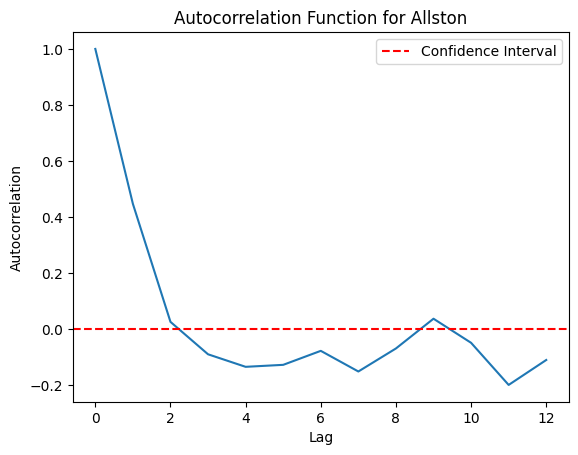

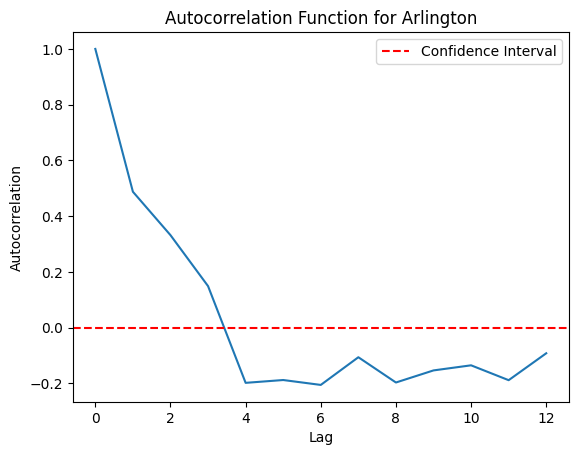

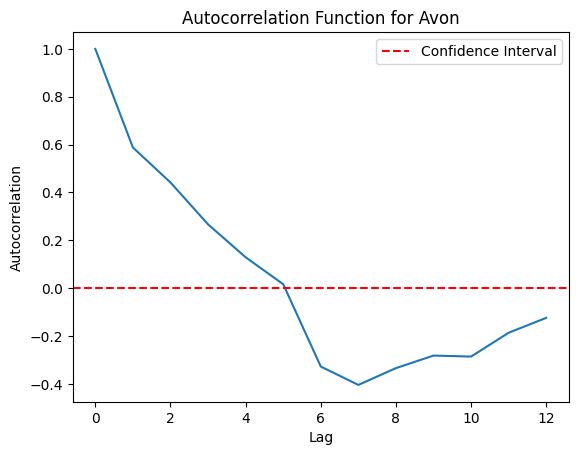

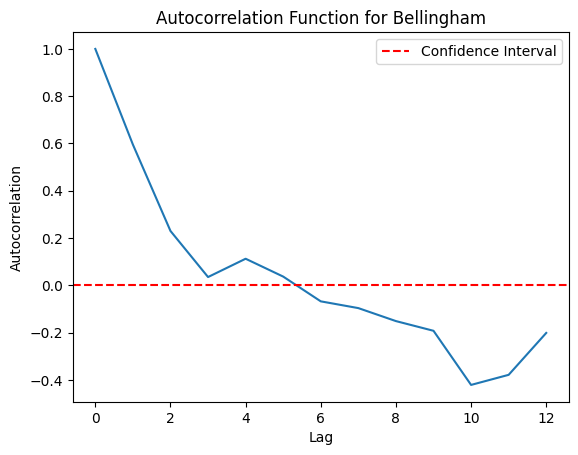

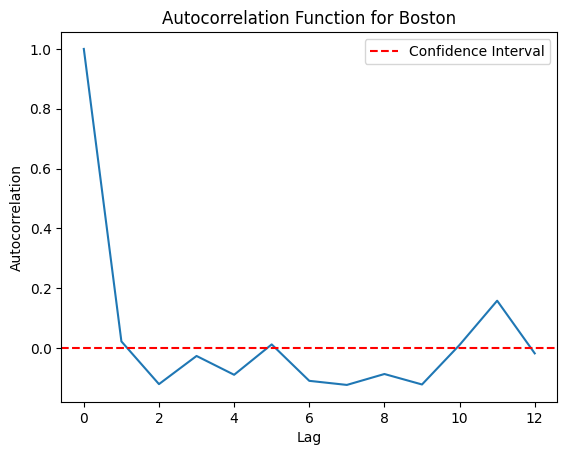

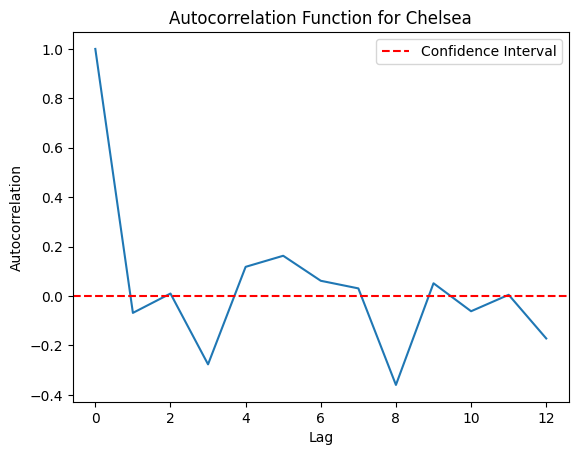

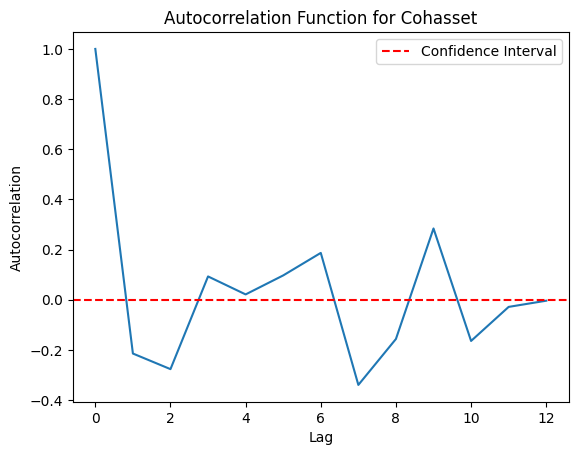

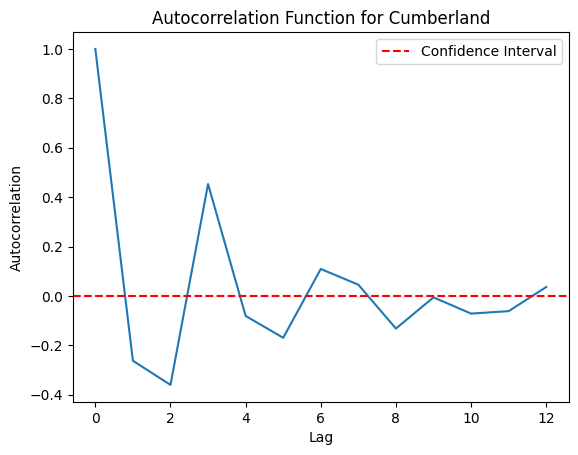

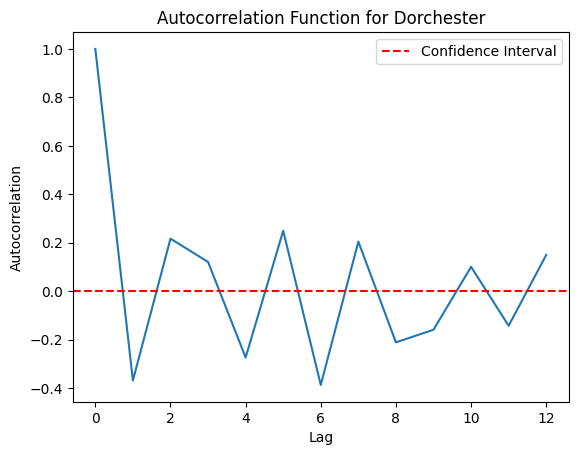

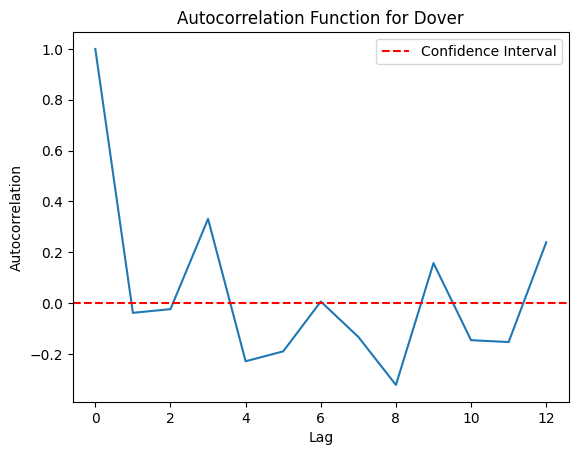

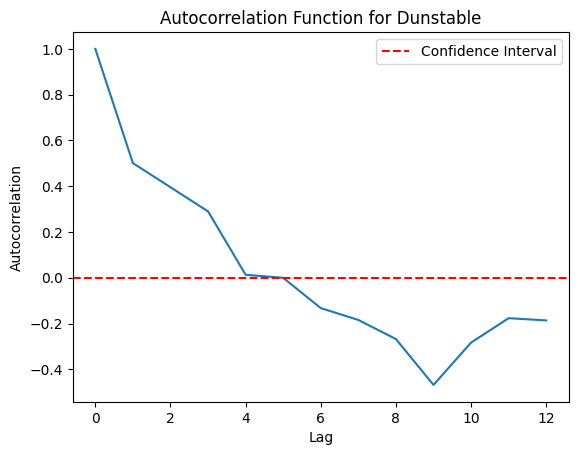

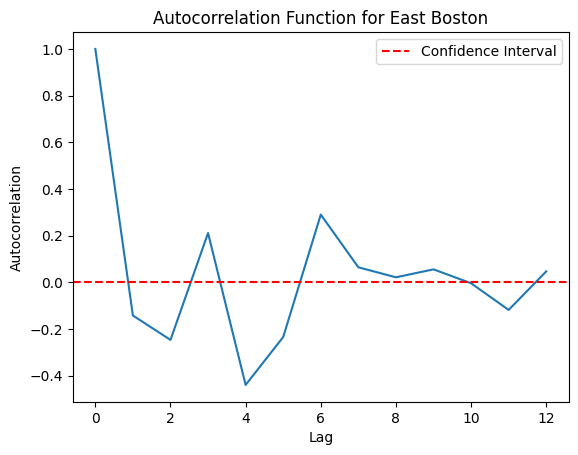

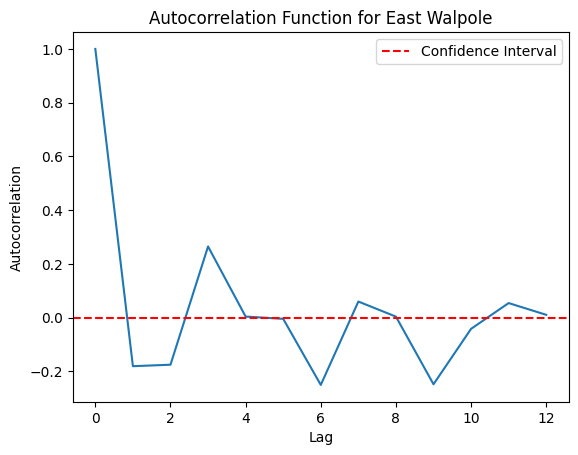

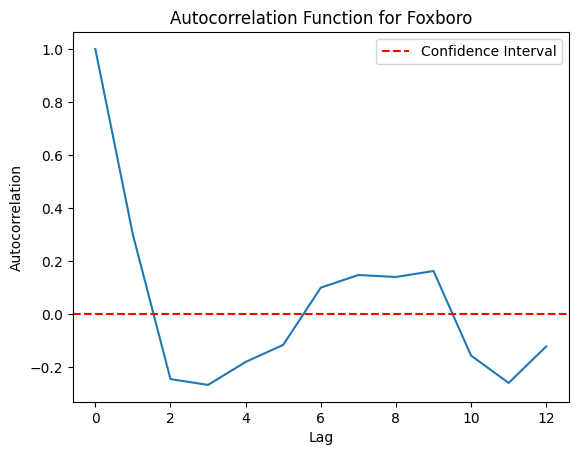

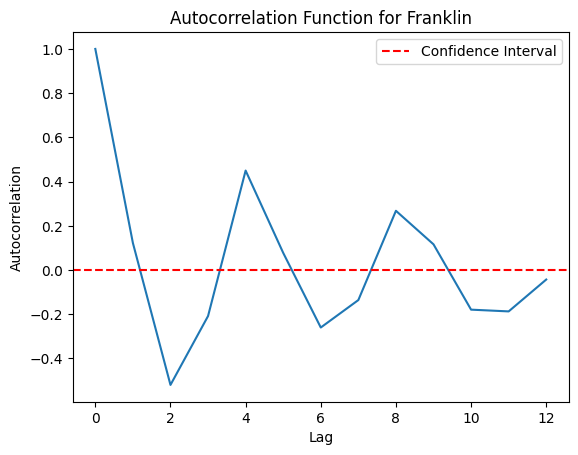

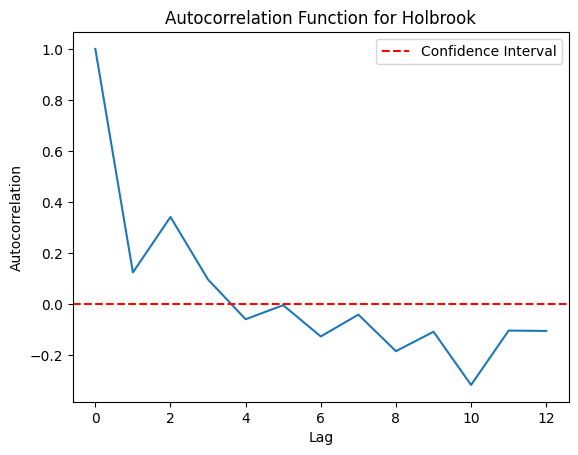

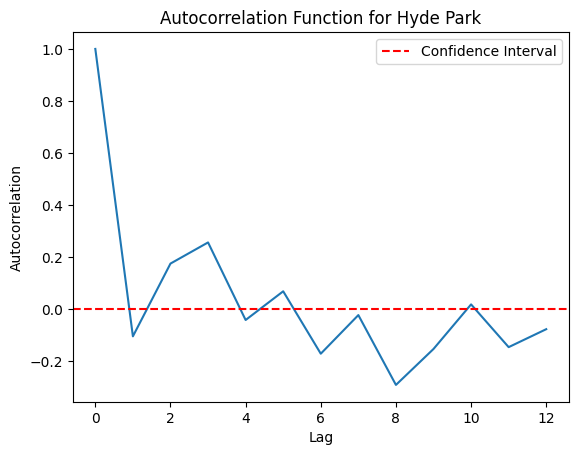

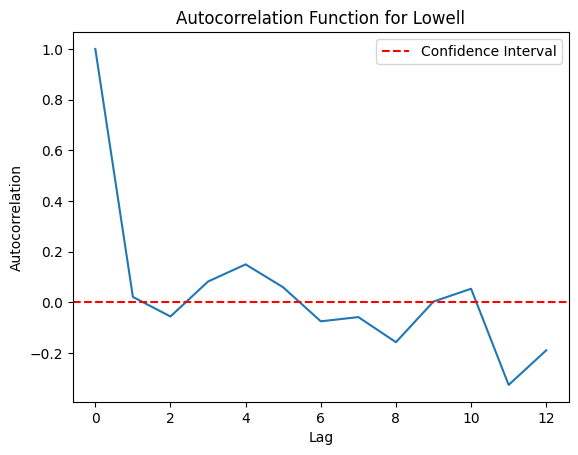

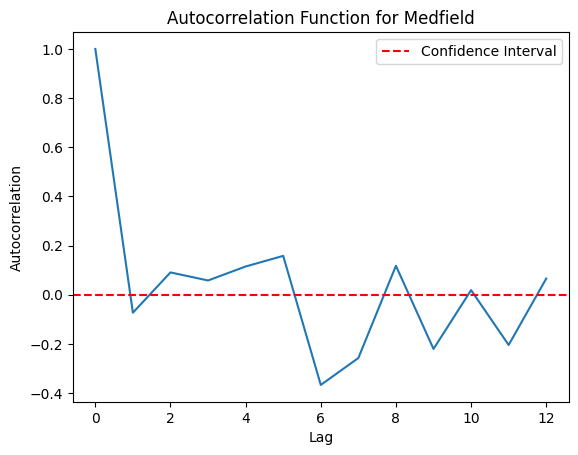

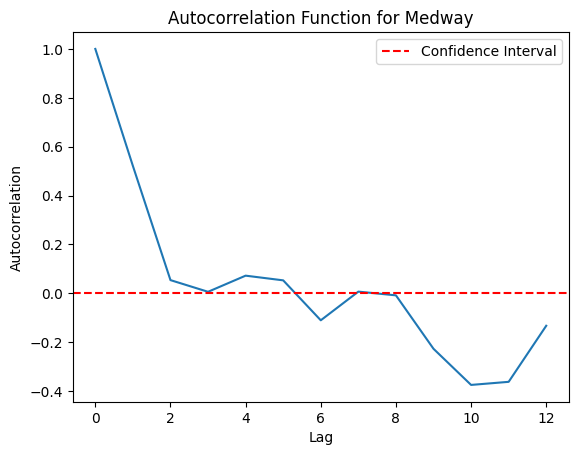

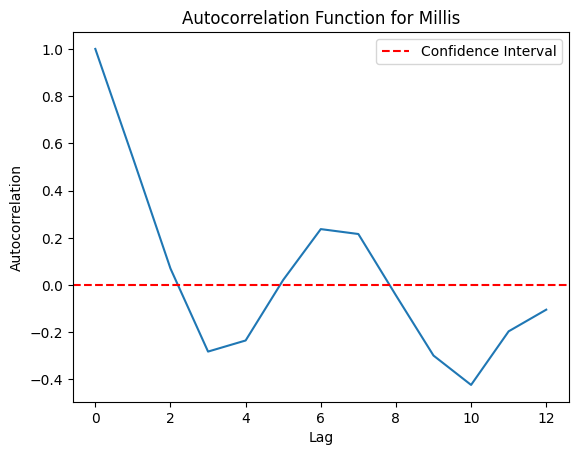

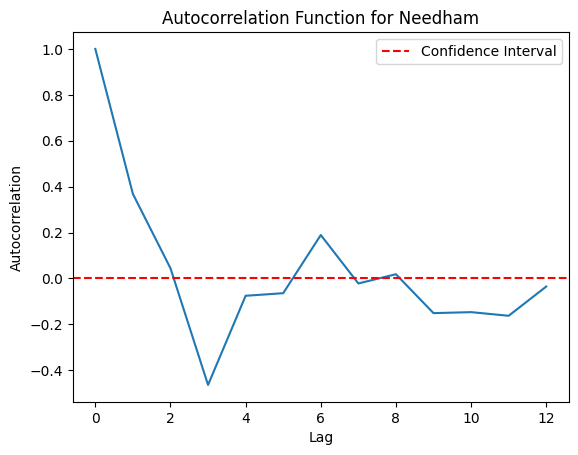

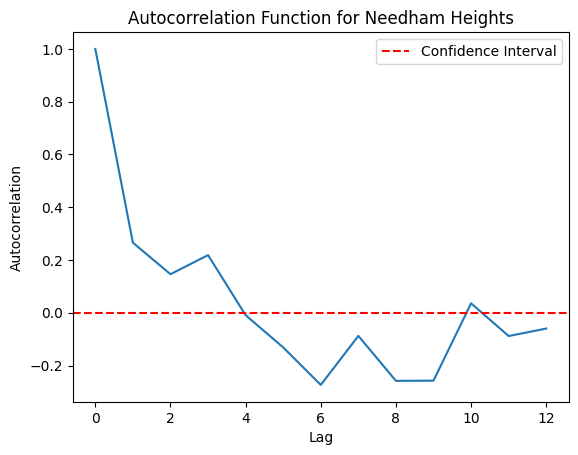

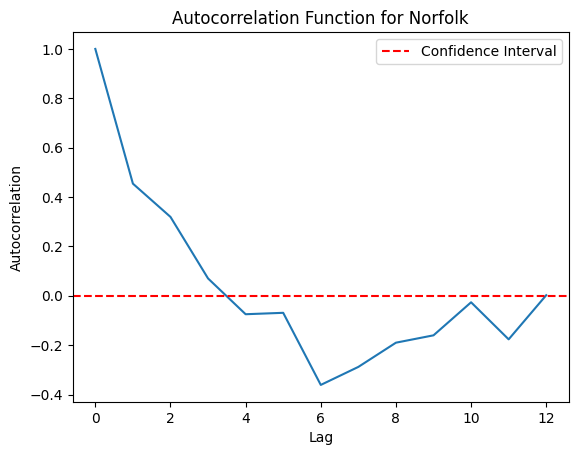

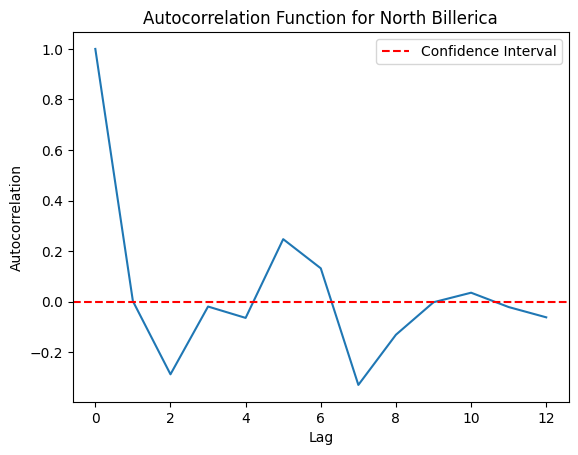

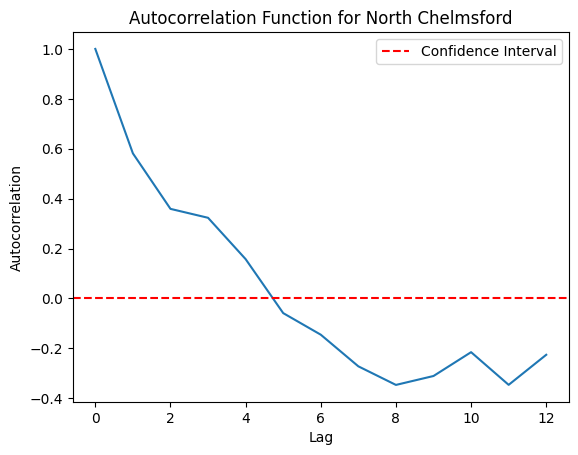

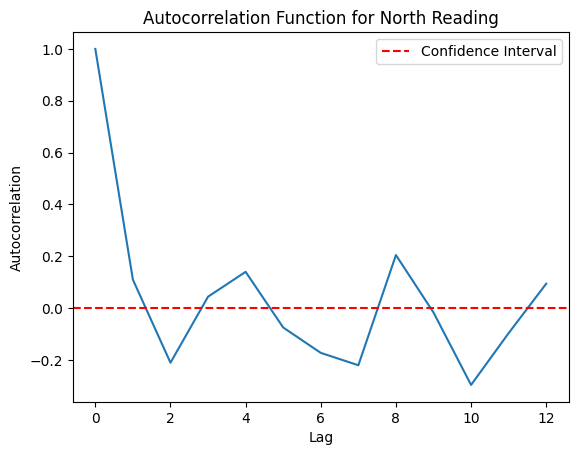

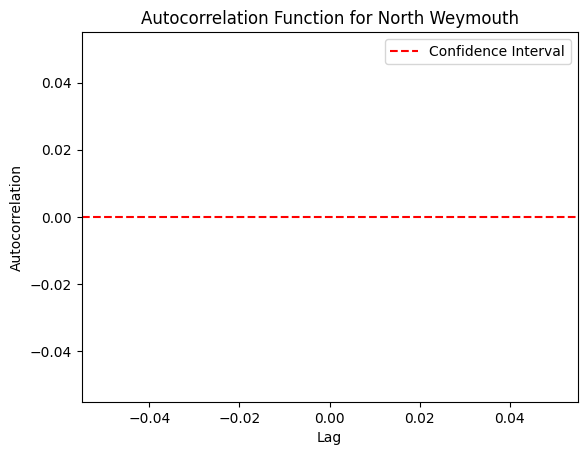

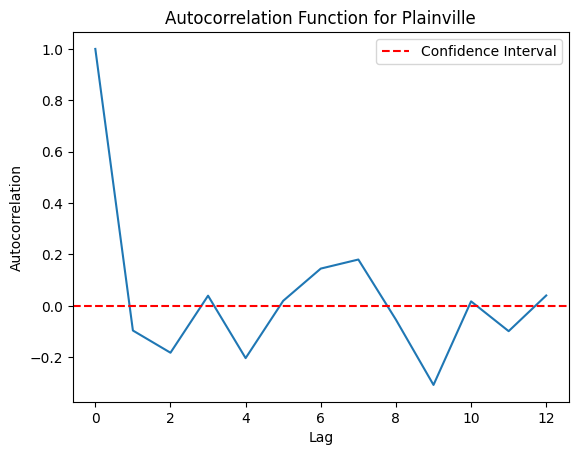

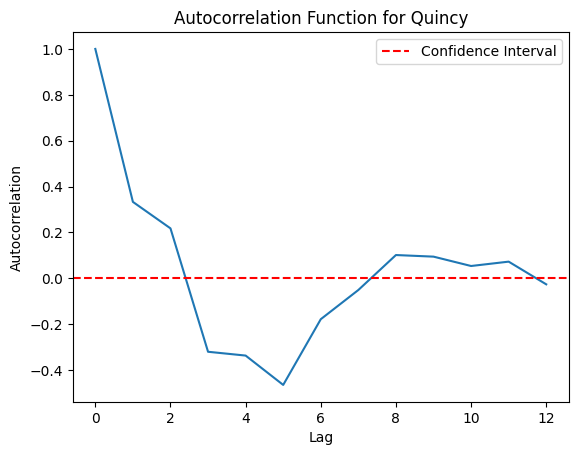

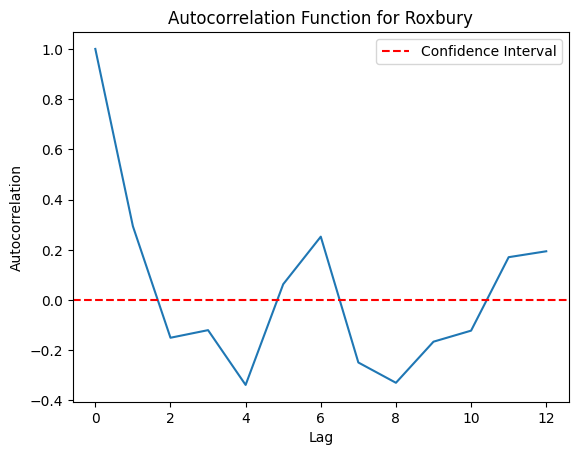

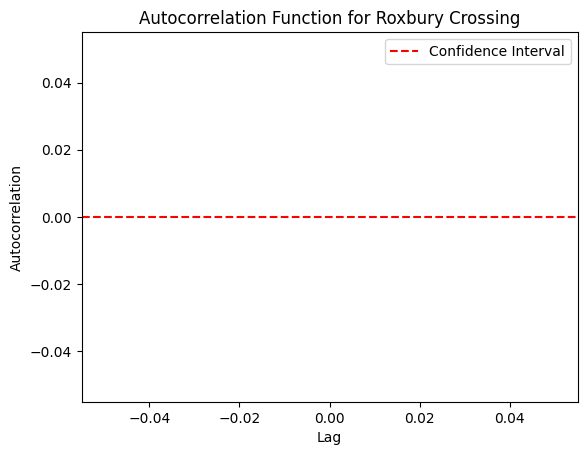

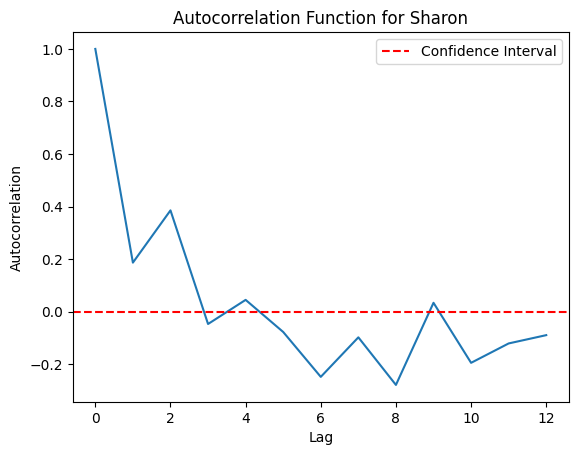

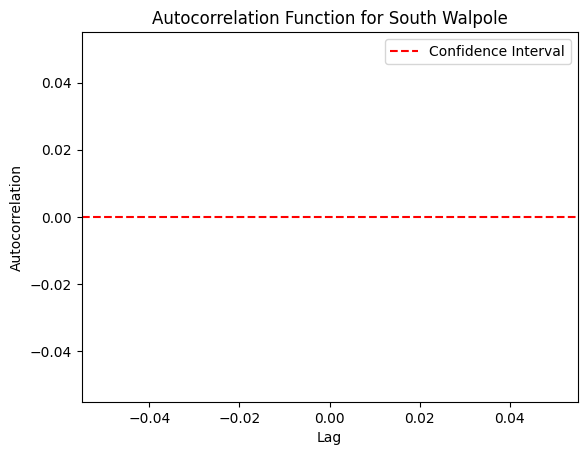

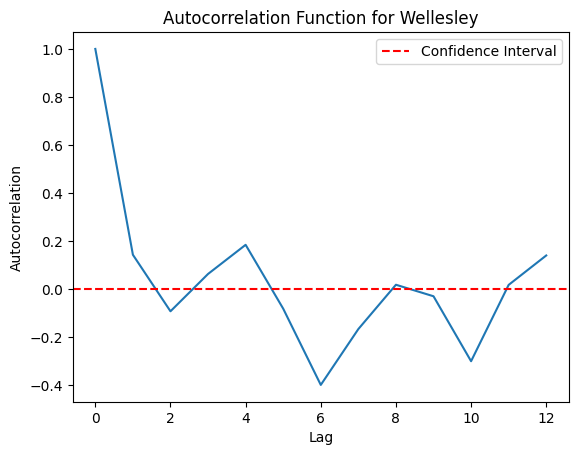

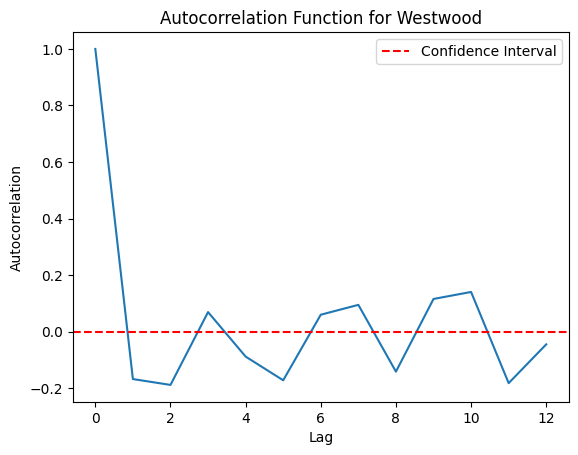

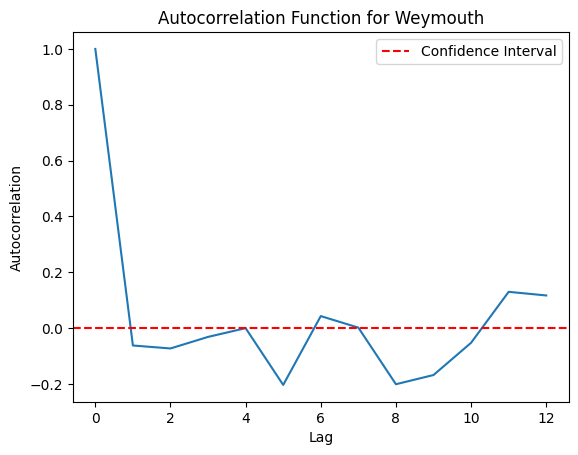

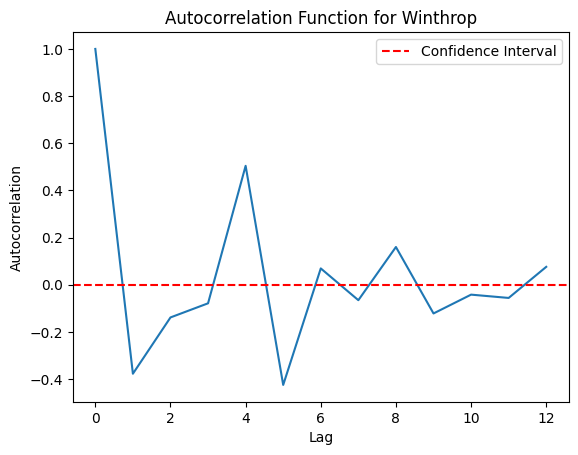

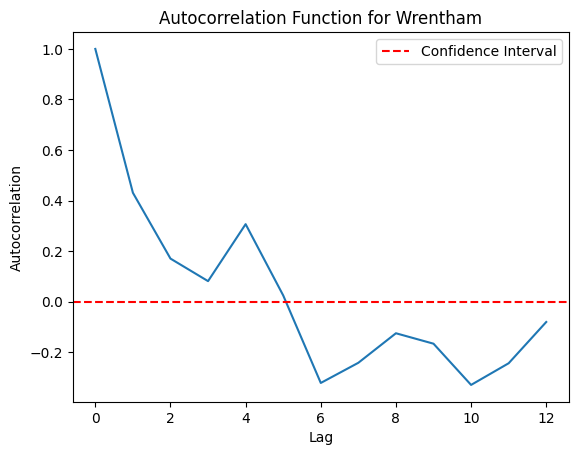

time: 8.52 s (started: 2024-03-13 22:11:30 +00:00)


In [ ]:
import matplotlib.pyplot as plt
def plot_autocorrelation(df_pivoted):
  """
  Plots the autocorrelation function (ACF) for each time series in a DataFrame.

  Args:
      df_pivoted (pandas.DataFrame): The DataFrame with cities as index and time series data in columns.
  """

  for city, city_data in df_pivoted.iterrows():
    fig, ax = plt.subplots()  # Create a figure and axis for plotting

    # Calculate autocorrelation coefficients (adjust lags if needed)
    acf_values = acf(city_data, nlags=40)  # Calculate ACF up to lag 40

    # Plot ACF with confidence intervals (optional)
    ax.plot(acf_values)
    ax.axhline(0, color='red', linestyle='--', label='Confidence Interval')  # Confidence interval line

    # Customize plot (optional)
    ax.set_title(f"Autocorrelation Function for {city}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.legend()
    plt.show()

# Example usage
plot_autocorrelation(df_pivoted.copy())


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_models_and_predict(df_pivoted, training_window=5, testing_window=3, n_periods=4):
  """
  Fits ARIMA models on training data for each city in a DataFrame and predicts future values.

  Args:
      df_pivoted (pandas.DataFrame): The pivoted DataFrame with city names as index and year-quarters as columns.
      training_window (int, optional): The number of columns to use for training data (Defaults to 10).
      testing_window (int, optional): The number of columns to use for testing data (Defaults to 4).
      n_periods (int, optional): The number of future periods to predict (Defaults to 1).

  Returns:
      dict: A dictionary with city names as keys and a tuple containing predictions and Ljung-Box test results as values.
  """
  predictions_dict = {}
  for city, city_data in df_pivoted.iterrows():
    # Split data into training and testing sets
    df_train, df_test = train.loc[city].to_frame(), test.loc[city].to_frame()
    # Fit ARIMA model on training data
    try:
      model = ARIMA(df_train, order=(2, 1, 4))
      model_fit = model.fit()
    except:
      print(f"ARIMA model fitting failed for city: {city}")
      continue  # Skip to next city if model fitting fails

    # Get predictions
    future_predictions = model_fit.predict(start=len(df_train), end=len(df_train) + n_periods - 1)

    # Perform Ljung-Box test
    ljungbox_results = sm.stats.acorr_ljungbox(model_fit.resid)

    dickey_fuller_results = adfuller(df_train)  # Perform test on original time series

    if dickey_fuller_results[1] > 0.05:
      print(f"Warning: Time series data for city {city} might not be stationary. Consider differencing.")

    # Store predictions and test results
    predictions_dict[city] = (future_predictions.tolist(), ljungbox_results.lb_pvalue[1], dickey_fuller_results[1])

  return predictions_dict


# Example usage
predictions_dict = fit_arima_models_and_predict(df_pivoted.copy())


time: 7.62 s (started: 2024-03-14 01:31:27 +00:00)


In [ ]:
arima_predictions = {key:tup[0] for key, tup in predictions_dict.items()}

time: 543 µs (started: 2024-03-13 23:17:26 +00:00)


In [ ]:
def plot_time_series_predictions(df_pivoted, predictions, city_to_plot='Wellesley'):
  """
  Plots time series data from a DataFrame with predicted values overlaid.

  Args:
      df_pivoted (pandas.DataFrame): The DataFrame with city names as index and year-quarters as columns (containing actual values).
      predictions (dict): A dictionary with city names as keys and lists of predicted values as values.
      city_to_plot (str, optional): The city name for which to plot the data and predictions (Defaults to 'Wellesley').
  """
  city_data = df_pivoted.loc[city_to_plot]
  predicted_values = predictions[city_to_plot]

  # Plotly time series with predictions (interactive)
  plot_data = [go.Scatter(x=city_data.index, y=city_data.values, name='Actual Prices'),
               go.Scatter(x=city_data.index[-4:],
                          y=predicted_values, name='Predicted Prices')]
  fig = go.Figure(data=plot_data)
  fig.update_layout(title=f"Price Predictions for {city_to_plot}: ARIMA Model",
                    xaxis_title="Year-Quarter",
                    yaxis_title="Average Price",
                    title_y=0.85,
                    title_x=0.5,
                    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
  fig.show()

time: 841 µs (started: 2024-03-13 23:13:06 +00:00)


In [ ]:
rmse_dict = {}
for city, (predictions, _, _) in predictions_dict.items():
  actual = test.loc[city].to_list()
  #aic = metrics.adjusted_rand_score(actual, predictions
  rmse = np.sqrt(metrics.mean_squared_error(actual, predictions))
  rmse_dict[city] = rmse

# Print results (modify as needed)
print("City\tRMSE")
print("-----\t----\t")
all_rmse = []
for city, rmse in rmse_dict.items():
  print(f"{city}:", rmse)
  all_rmse.append(rmse)
print(f"Max RMSE: {np.max(all_rmse)}")
print(f"Average RMSE: {np.mean(all_rmse)}")
print(f"Min RMSE: {np.min(all_rmse)}")
print(f"25th RMSE: {np.percentile(all_rmse, 25)}")

City	RMSE
-----	----	
Allston: 743860.4640558029
Arlington: 77393.71714507494
Avon: 39758.05542741476
Bellingham: 77727.18810123303
Boston: 283319.9460342459
Chelsea: 102990.86885915078
Cohasset: 399496.65360903
Cumberland: 408517.7326485193
Dorchester: 60774.69547298624
Dover: 767497.7187048292
Dunstable: 214125.09153099504
East Boston: 225913.255980401
East Walpole: 121338.90850748973
Foxboro: 109751.26419509339
Franklin: 104459.26961855852
Holbrook: 27945.395315627287
Hyde Park: 119509.82716084788
Lowell: 39802.13985581551
Medfield: 88397.07500137735
Medway: 175120.37518987744
Millis: 130608.1417737824
Needham: 229919.3799815963
Needham Heights: 272293.63650725037
Norfolk: 61405.9574768203
North Billerica: 147269.72495024686
North Chelmsford: 75228.51794412259
North Reading: 140722.6662615212
North Weymouth: 63251.94606104156
Plainville: 71377.14417789334
Quincy: 20528.683200940577
Roxbury: 161088.21455749453
Roxbury Crossing: 386245.57588848774
Sharon: 157022.8373864936
South Walpo

In [ ]:
for city in test.index:
  plot_time_series_predictions(df_pivoted_imputed, arima_predictions, city_to_plot=city)

time: 442 ms (started: 2024-03-13 23:17:39 +00:00)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


time: 804 µs (started: 2024-03-13 20:51:42 +00:00)


In [ ]:
def fit_arima_models_and_predict(df_pivoted, training_window=7, testing_window=4, n_periods=4):
  """
  Fits ARIMA models on differenced training data for each city in a DataFrame and predicts future values.

  Args:
      df_pivoted (pandas.DataFrame): The pivoted DataFrame with city names as index and year-quarters as columns.
      training_window (int, optional): The number of columns to use for training data (Defaults to 5).
      testing_window (int, optional): The number of columns to use for testing data (Defaults to 3).
      n_periods (int, optional): The number of future periods to predict (Defaults to 2).

  Returns:
      dict: A dictionary with city names as keys and a tuple containing predictions and Ljung-Box test results as values.
  """

  predictions_dict = {}
  for city, city_data in df_pivoted.iterrows():
    # Split data into training and testing sets
    df_train, df_test = city_data[:training_window], city_data[training_window:]

    # PERFORM DIFFERENCING
    df_train_diff = df_train.diff().dropna()  # Difference training data

    # Fit ARIMA model on differenced training data (adjust order as needed)
    try:
      model = ARIMA(df_train_diff, order=(2, 0, 4))
      model_fit = model.fit()
    except:
      print(f"ARIMA model fitting failed for city: {city}")
      predictions_dict[city] = ([], None)  # Store empty lists for failed models
      continue  # Skip to next city if model fitting fails

    # Get predictions (inverse the differencing)
    future_predictions = model_fit.forecast(steps=n_periods)[0]
    future_predictions = pd.Series(future_predictions, index=df_test.index)
    future_predictions = df_train.iloc[-1] + future_predictions.cumsum()  # Inverse differencing

    # Perform Ljung-Box test on differenced residuals
    ljungbox_results = sm.stats.acorr_ljungbox(model_fit.resid, lags=3)  # Adjusted for seasonality
    #print(ljungbox_results.lb_pvalue)

    # Store predictions and test results
    predictions_dict[city] = (future_predictions.tolist(), ljungbox_results.lb_pvalue, 0)

  return predictions_dict

# Example usage
predictions_dict = fit_arima_models_and_predict(df_pivoted.copy())

time: 5.44 s (started: 2024-03-13 22:14:48 +00:00)


In [ ]:
res = get_diagnostics(predictions_dict)

time: 1.32 ms (started: 2024-03-13 21:02:55 +00:00)


In [ ]:
only_predictions = {key:tup[0] for key, tup in predictions_dict.items()}

time: 740 µs (started: 2024-03-13 22:14:55 +00:00)


In [ ]:
for city in test.index:
  #plot_time_series_predictions(df_pivoted_imputed, only_predictions, city_to_plot=city)

time: 270 µs (started: 2024-03-13 22:40:34 +00:00)


# SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def fit_sarima_models_and_predict(df_pivoted, training_window=5, testing_window=3, n_periods=4, seasonal_order=(1, 3, 2, 4)):
  """
  Fits SARIMA models on training data for each city in a DataFrame and predicts future values.

  Args:
      df_pivoted (pandas.DataFrame): The pivoted DataFrame with city names as index and year-quarters as columns.
      training_window (int, optional): The number of columns to use for training data (Defaults to 5).
      testing_window (int, optional): The number of columns to use for testing data (Defaults to 3).
      n_periods (int, optional): The number of future periods to predict (Defaults to 1).
      seasonal_order (tuple, optional): The seasonal order for the SARIMA model (Defaults to (1, 1, 1, 4)).

  Returns:
      dict: A dictionary with city names as keys and a tuple containing predictions and Ljung-Box test results as values.
  """
  predictions_dict = {}
  for city, city_data in df_pivoted.iterrows():
    # Split data into training and testing sets
    df_train, df_test = train.loc[city].to_frame(), test.loc[city].to_frame()

    # Fit SARIMA model on training data
    try:
      model = SARIMAX(df_train, order=(2, 1, 1), seasonal_order=seasonal_order, enforce_stationarity=True)  # Adjust orders as needed
      model_fit = model.fit()  # Adjust optimization method if needed
    except:
      print(f"SARIMA model fitting failed for city: {city}")
      continue  # Skip to next city if model fitting fails

    # Get predictions
    future_predictions = model_fit.predict(start=len(df_train), end=len(df_train) + n_periods - 1)

    # Perform Ljung-Box test
    ljungbox_results = sm.stats.acorr_ljungbox(model_fit.resid)

    dickey_fuller_results = adfuller(df_train)

    # Store predictions and test results
    predictions_dict[city] = (future_predictions.tolist(), ljungbox_results, dickey_fuller_results)

  return predictions_dict


# Example usage
sarima_pred_dict = fit_sarima_models_and_predict(df_pivoted.copy(), seasonal_order=(3, 2, 2, 4))

time: 2.24 s (started: 2024-03-14 01:14:06 +00:00)


In [ ]:
sarima_pred = {key:tup[0] for key, tup in sarima_pred_dict.items()}

time: 553 µs (started: 2024-03-14 00:59:46 +00:00)


In [ ]:
#for city in test.index:
  #plot_time_series_predictions(df_pivoted_imputed, sarima_pred, city_to_plot=city)

time: 301 µs (started: 2024-03-14 01:12:29 +00:00)


In [ ]:
import numpy as np
from sklearn import metrics

# Calculate AIC and RMSE for each city
rmse_dict = {}
for city, (predictions, _, _) in sarima_pred_dict.items():
  actual = test.loc[city].to_list()
  #aic = metrics.adjusted_rand_score(actual, predictions
  rmse = np.sqrt(metrics.mean_squared_error(actual, predictions))
  rmse_dict[city] = rmse

# Print results (modify as needed)
print("City\tRMSE")
print("-----\t----\t")
all_rmse = []
for city, rmse in rmse_dict.items():
  print(f"{city}:", rmse)
  all_rmse.append(rmse)
print(f"Max RMSE: {np.max(all_rmse)}")
print(f"Average RMSE: {np.mean(all_rmse)}")
print(f"Min RMSE: {np.min(all_rmse)}")

City	RMSE
-----	----	
Allston: 836475.3935692715
Arlington: 276471.821863367
Avon: 80098.54836642164
Bellingham: 68798.91791345738
Boston: 1167834.5819364574
Chelsea: 92446.0924315299
Cohasset: 531268.1465848754
Cumberland: 516014.41428857256
Dorchester: 115942.11113935018
Dover: 667034.7998299749
Dunstable: 314799.62091132713
East Boston: 634287.561420969
East Walpole: 259721.81628486345
Foxboro: 184144.27911522213
Franklin: 85973.7280976679
Holbrook: 103980.67276367497
Hyde Park: 124761.84479329575
Lowell: 56967.67946242637
Medfield: 223733.22953171423
Medway: 223232.918078289
Millis: 468684.85395868507
Needham: 297210.88033011503
Needham Heights: 608643.7917114599
Norfolk: 98028.88864476199
North Billerica: 533315.136685753
North Chelmsford: 105874.02467155323
North Reading: 251965.02510851825
North Weymouth: 180861.56607184
Plainville: 132851.20599831076
Quincy: 191295.66002135046
Roxbury: 282310.5748508355
Roxbury Crossing: 942180.34194278
Sharon: 185978.84209378893
South Walpole:

In [ ]:
test.loc["Wellesley"].to_list()

[1812882.6530612244, 2051883.6633663366, 2037656.4814814816, 1693450.0]

time: 4.76 ms (started: 2024-03-14 01:19:28 +00:00)


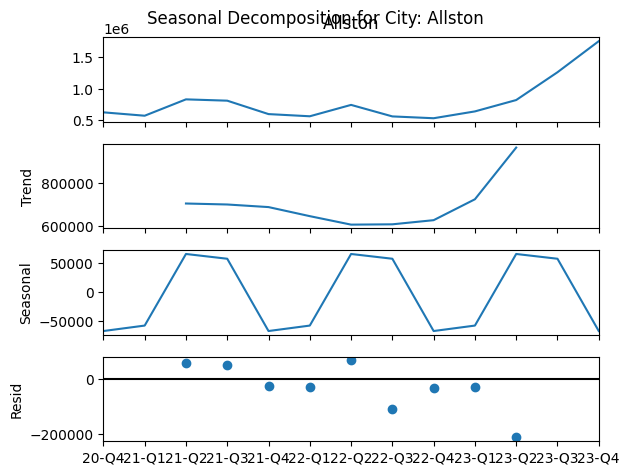

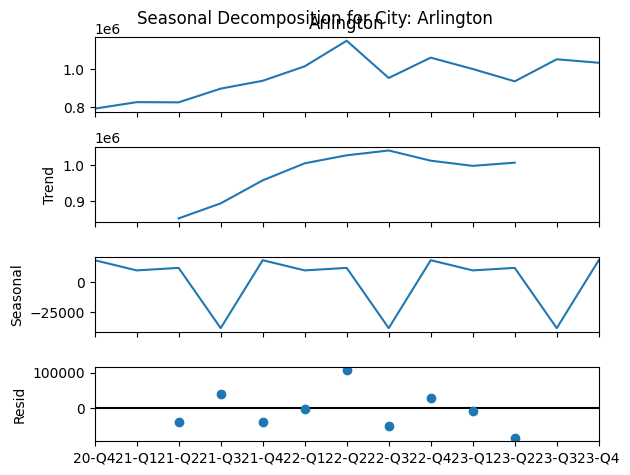

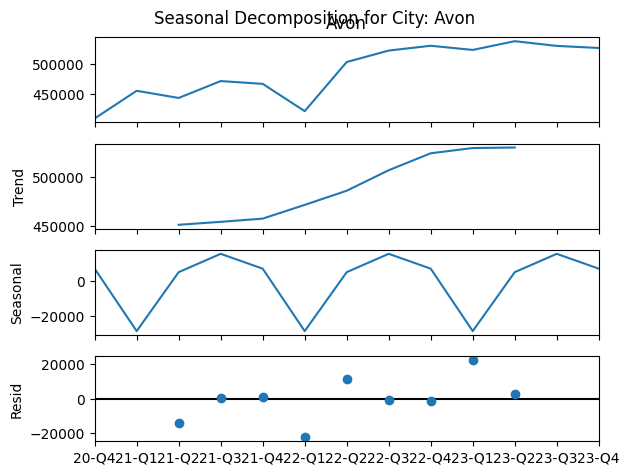

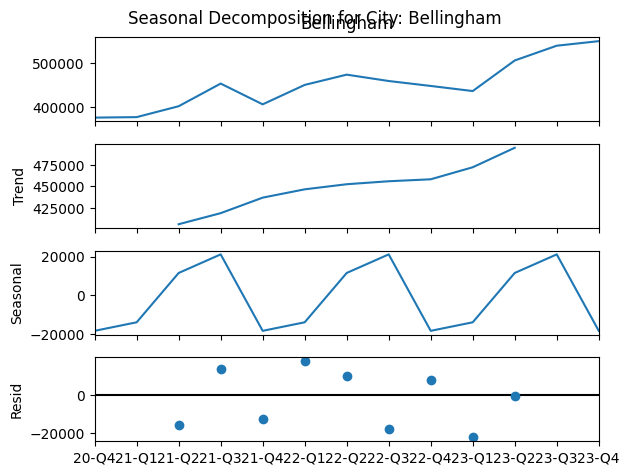

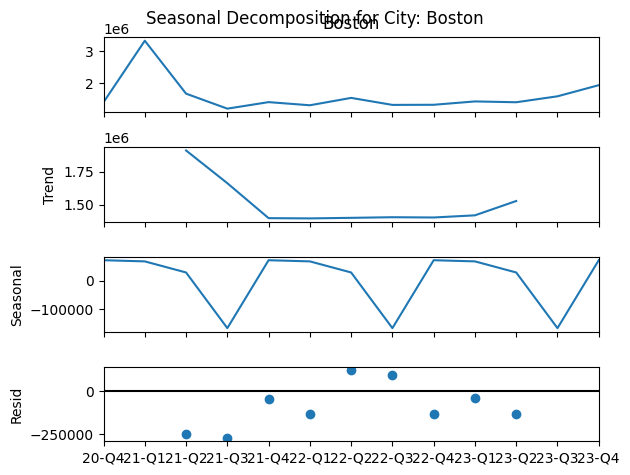

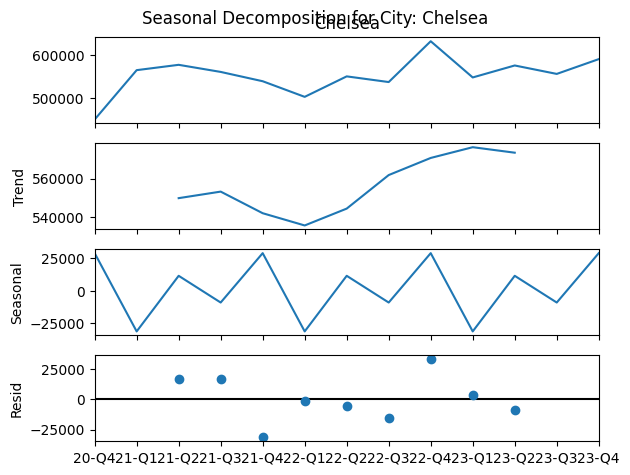

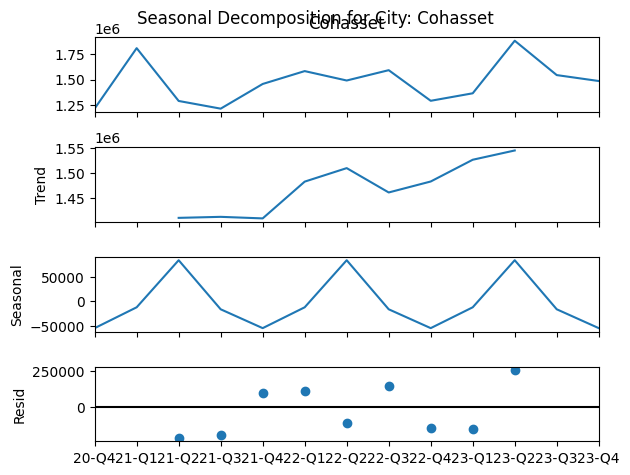

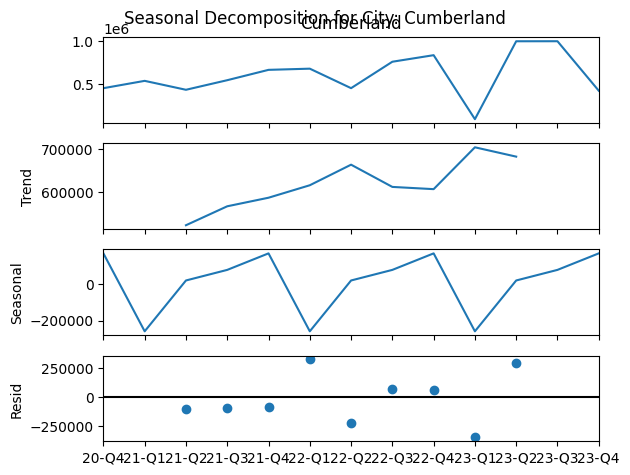

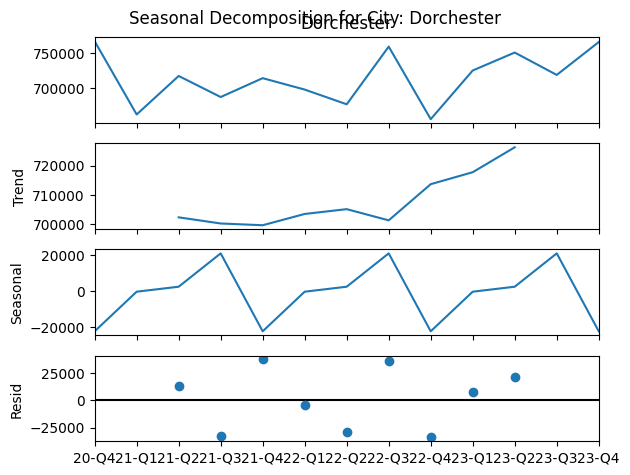

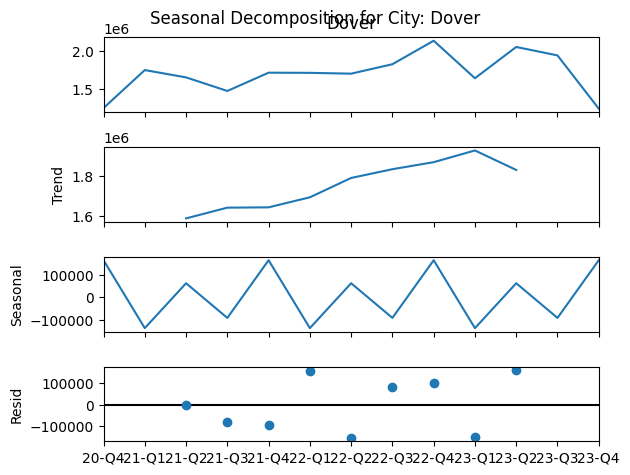

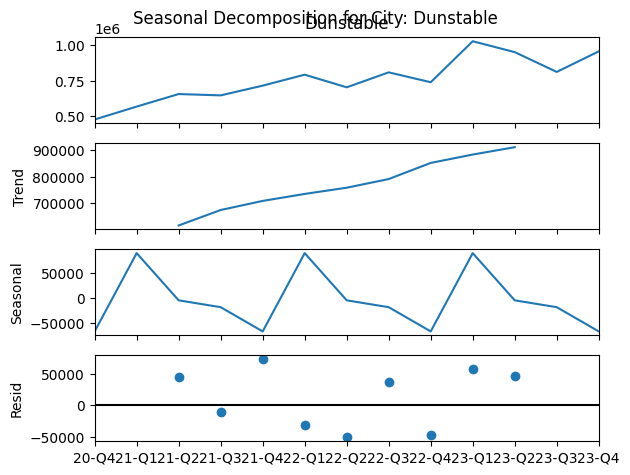

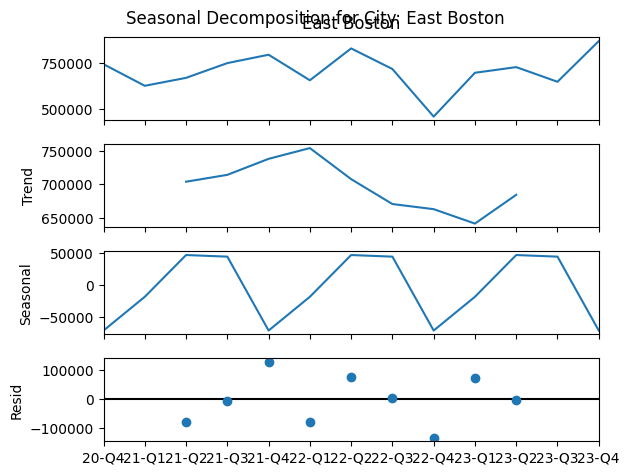

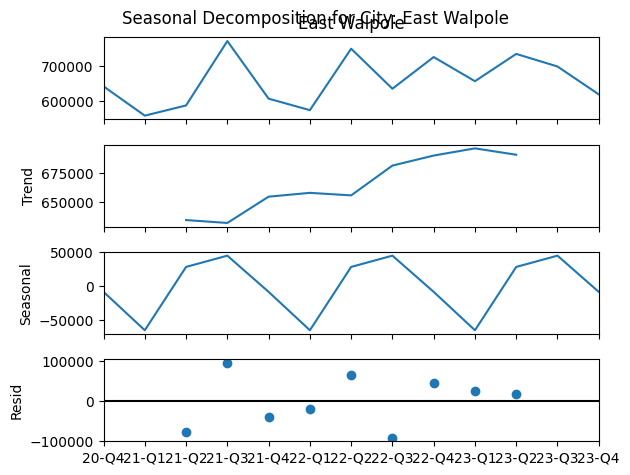

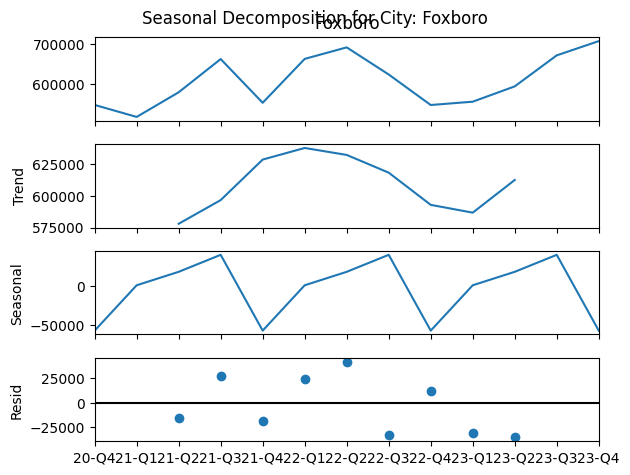

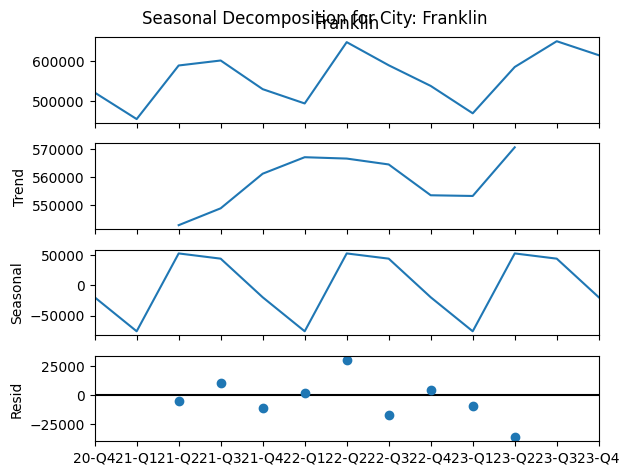

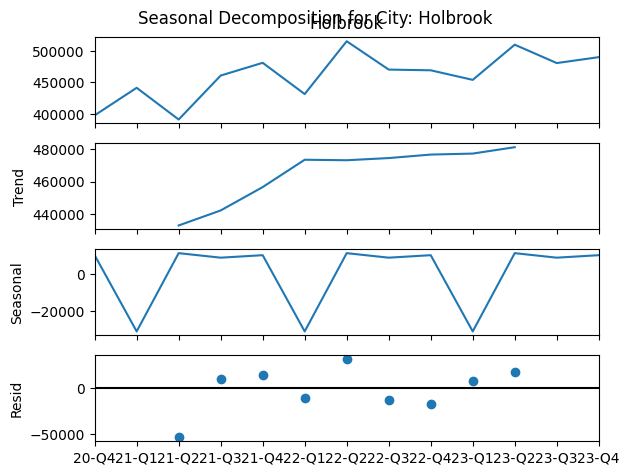

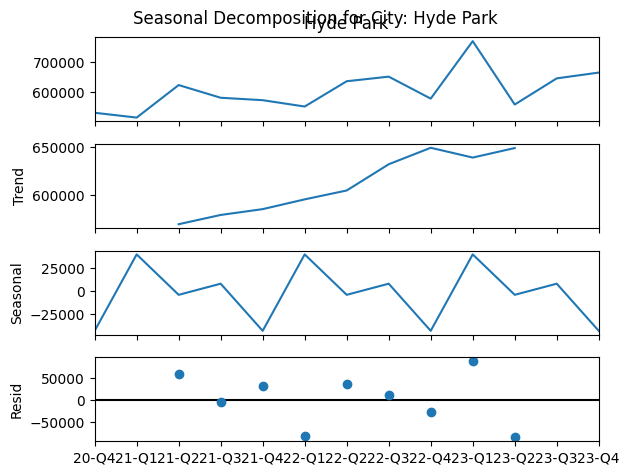

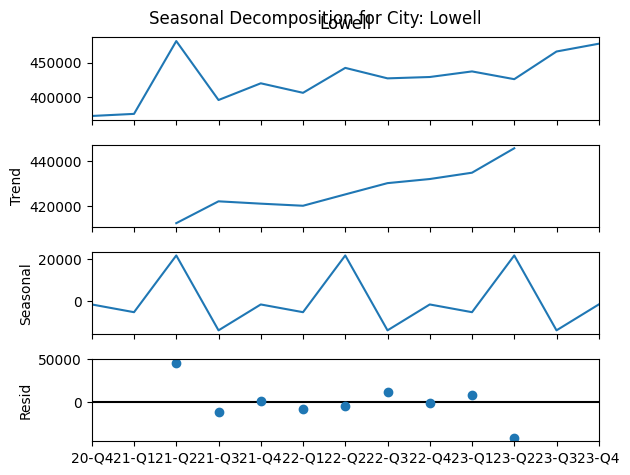

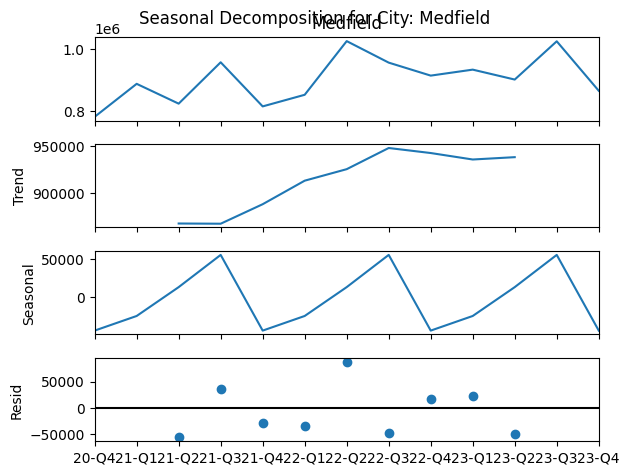

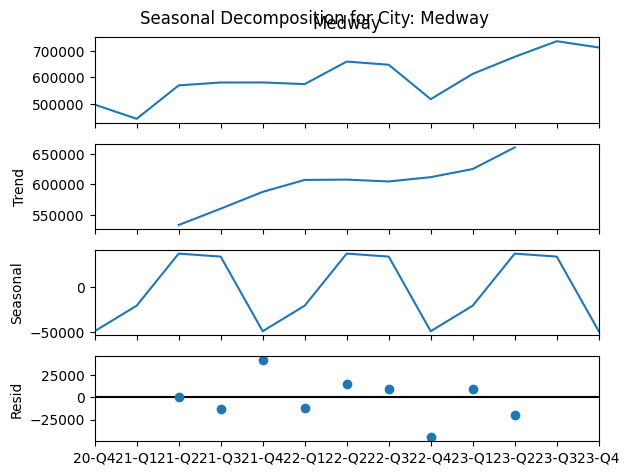

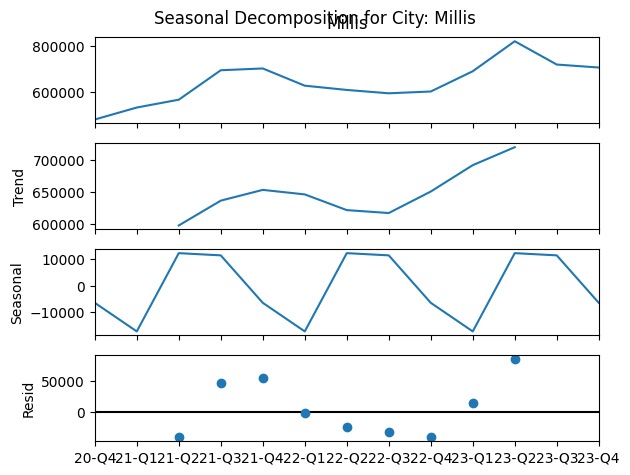

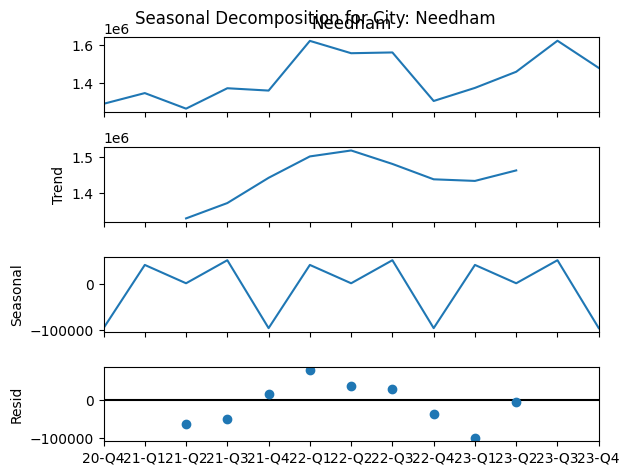

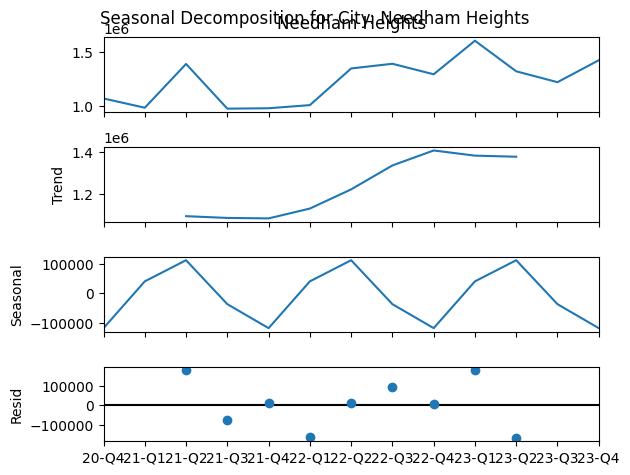

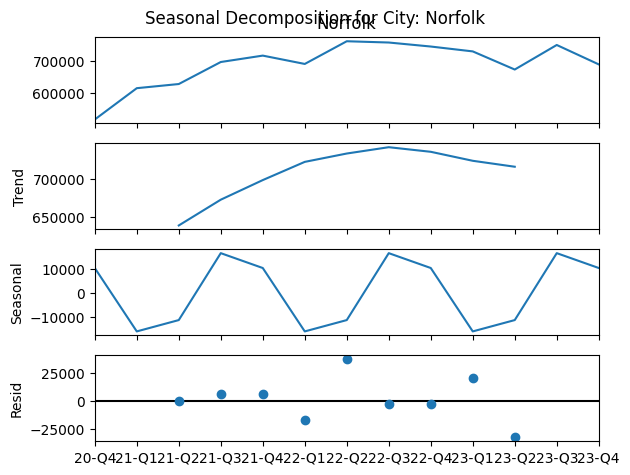

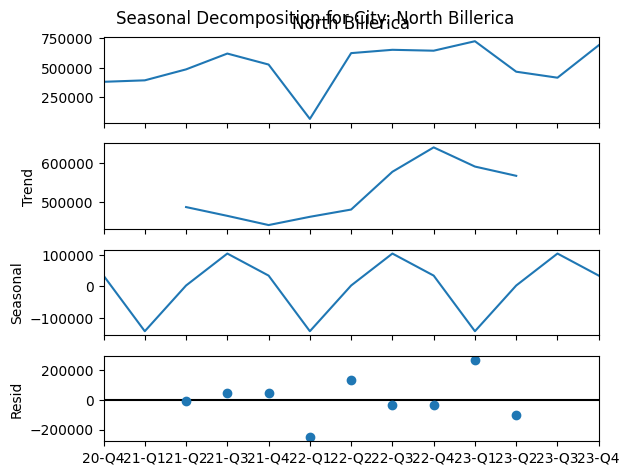

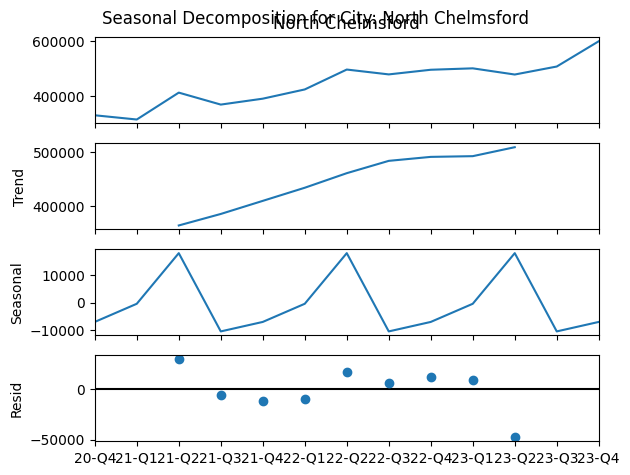

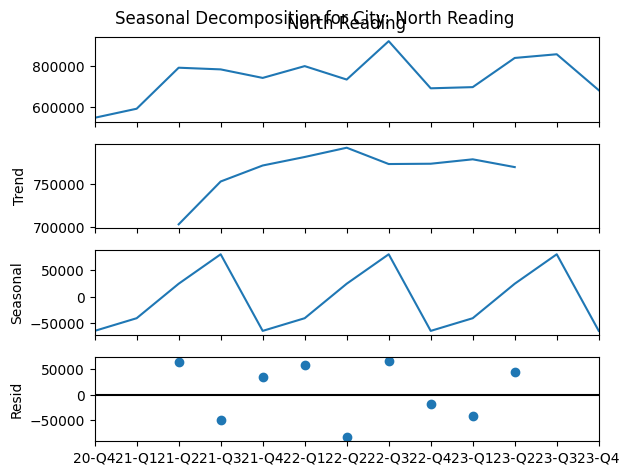

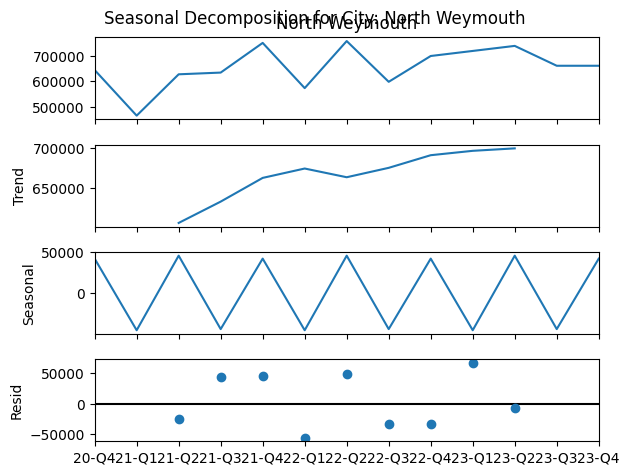

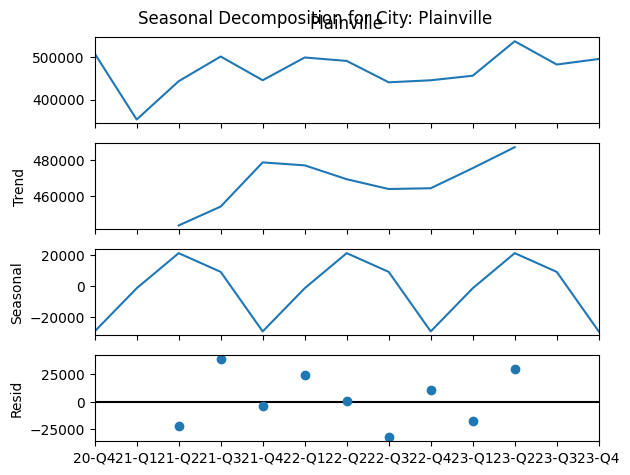

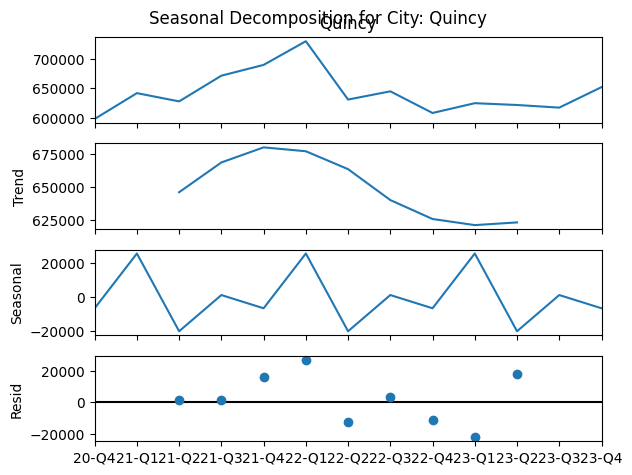

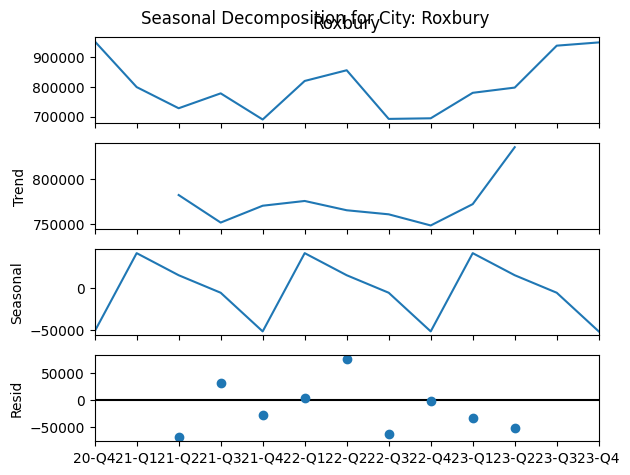

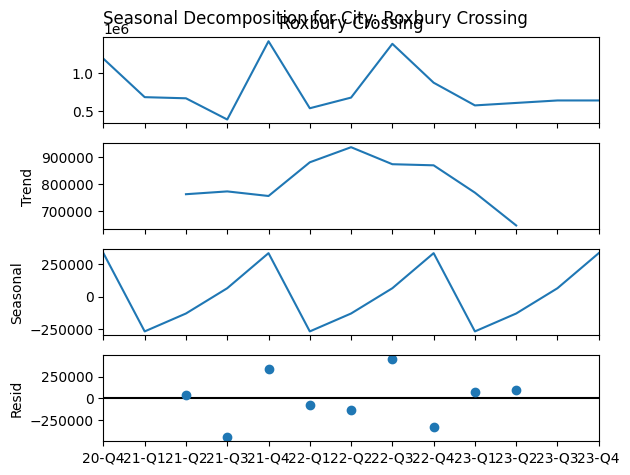

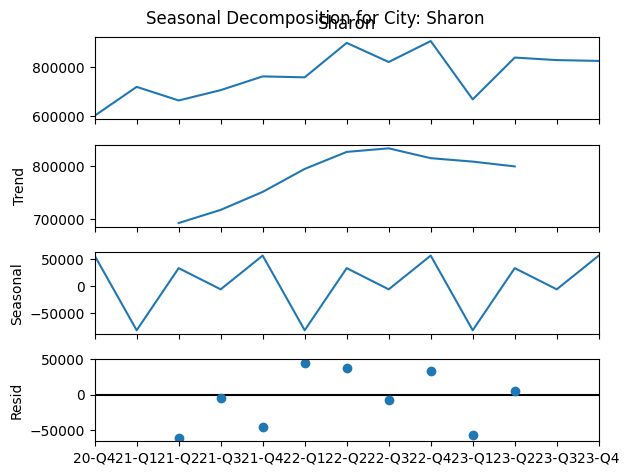

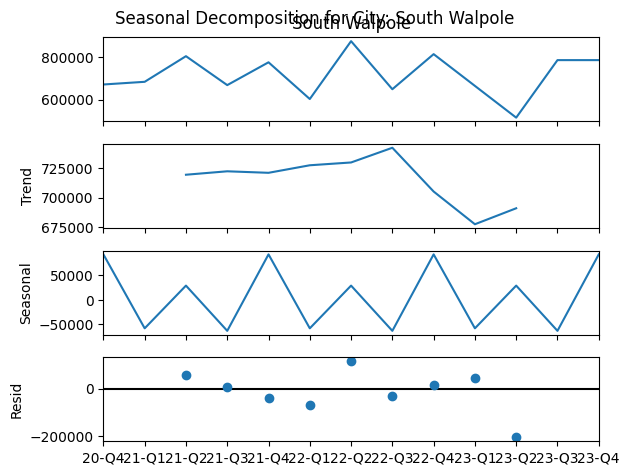

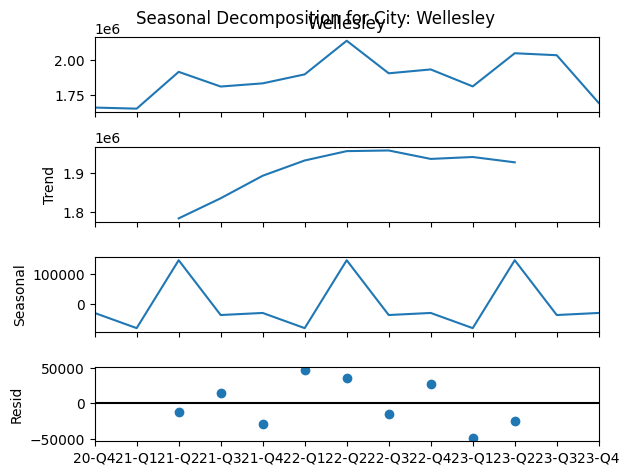

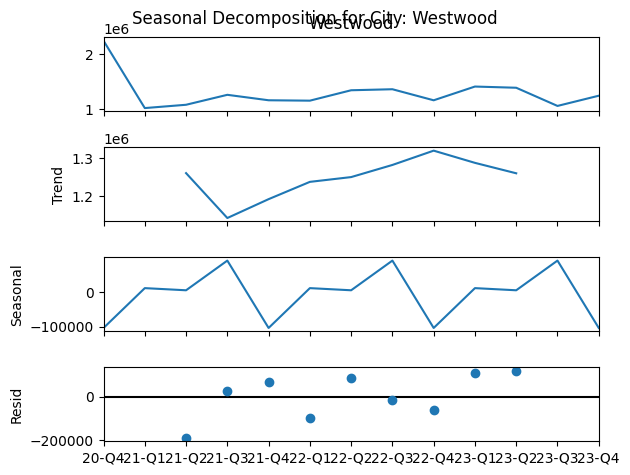

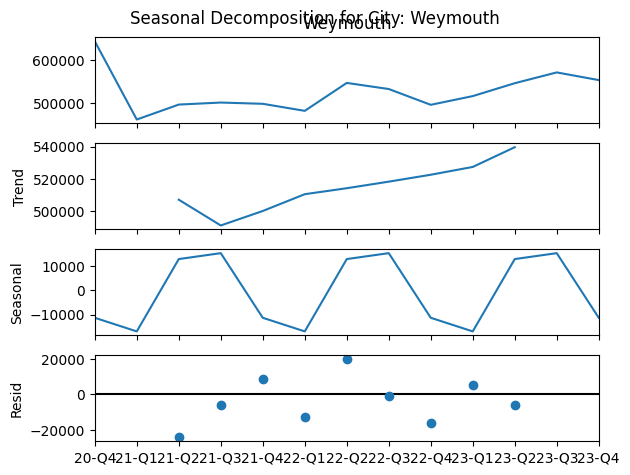

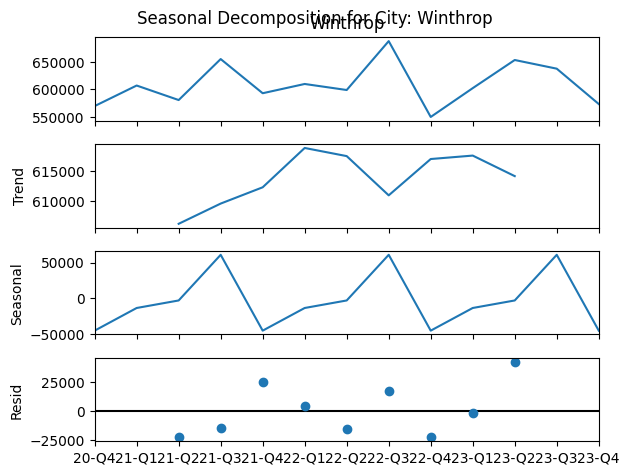

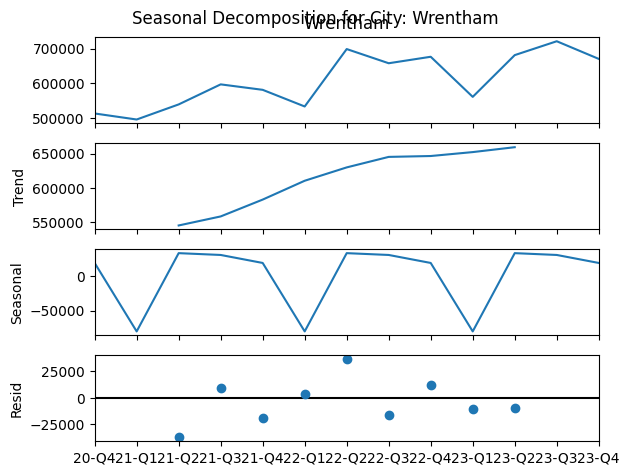

time: 24.2 s (started: 2024-03-13 18:07:57 +00:00)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def analyze_seasonality(df_pivoted):
  """
  Analyzes seasonality in a DataFrame with time series data (e.g., quarterly data).

  Args:
      df_pivoted (pandas.DataFrame): The DataFrame with city names as index and year-quarters as columns.

  Prints:
      Displays plots for trend, seasonal component, and residuals of the decomposed time series for each city.
  """
  for city, city_data in df_pivoted.iterrows():
    decomposition = seasonal_decompose(city_data, model='additive', period=4)  # Adjust period if needed

    # Plot the decomposition components
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition for City: {city}")
    plt.show()

    # ACF and PACF plots for original and deseasonalized data (optional)
    # You can uncomment these lines to analyze ACF/PACF plots
    # acf_plot(city_data)
    # acf_plot(decomposition.resid)
analyze_seasonality(df_pivoted_imputed)

# Clean Data

In [ ]:
keep_cities = sorted_df[sorted_df['yr-quarter-string'] == '21-Q1']['city'].unique()
len(keep_cities)

74

time: 216 ms (started: 2024-03-07 16:02:40 +00:00)


In [ ]:
keep_cities

array(['Westwood', 'South Weymouth', 'Wellesley', 'Winthrop', 'Quincy',
       'Millis', 'Hyde Park', 'Dorchester', 'Chelsea', 'Holbrook',
       'East Weymouth', 'Medfield', 'North Weymouth', 'Bellingham',
       'Boston', 'Cohasset', 'Foxboro', 'Wrentham', 'Needham', 'Franklin',
       'Mattapan', 'Avon', 'Allston', 'Roxbury', 'Sharon', 'Dover',
       'Norfolk', 'Brookline', 'Weymouth', 'Plainville', 'Medway',
       'East Boston', 'Jamaica Plain', 'Milton', 'Lawrence', 'Haverhill',
       'Merrimac', 'Boxford', 'North Andover', 'Roxbury Crossing', 'Lynn',
       'Groveland', 'East Walpole', 'Needham Heights', 'Wellesley Hills',
       'South Walpole', 'Walpole', 'Cumberland', 'Ipswich',
       'South Hamilton', 'Lowell', 'North Chelmsford', 'Essex',
       'Gloucester', 'Wenham', 'Lynnfield', 'Arlington', 'Topsfield',
       'Rowley', 'North Reading', 'Manchester', 'Salisbury', 'Rockport',
       'Newbury', 'North Billerica', 'Middleton', 'Beverly',
       'West Newbury', 'Tewksbur

time: 4.86 ms (started: 2024-03-07 16:08:27 +00:00)


In [ ]:
# Label houses in Wellesley Hills as Wellesley
sorted_df.loc[sorted_df.city == "Wellesley Hills", 'city'] = "Wellesley"
sorted_df = sorted_df.drop(sorted_df[sorted_df.dateSoldString < "21-Q1"].index)

time: 7.09 s (started: 2024-03-07 16:19:27 +00:00)


In [ ]:
my_dta = sorted_df[sorted_df['city'].isin(cities_to_keep)]
average_p = my_dta.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()
average_p_county = my_dta.groupby(['yr-quarter-string', 'county'])['lastSoldPrice'].mean().to_frame('price').reset_index()
average_p

yr-quarter-string           city         price
0               21-Q1        Allston  5.826250e+05
1               21-Q1      Arlington  8.361400e+05
2               21-Q1           Avon  4.548500e+05
3               21-Q1     Bellingham  3.769296e+05
4               21-Q1         Boston  3.411224e+06
..                ...            ...           ...
460             23-Q4       Winthrop  5.732412e+05
461             23-Q4       Wrentham  6.797941e+05
462             24-Q1      Arlington  2.037500e+06
463             24-Q1         Lowell  3.550000e+05
464             24-Q1  North Reading  7.180000e+05

[465 rows x 3 columns]

time: 1.14 s (started: 2024-03-07 20:45:09 +00:00)


In [ ]:
fig = ex.line(average_p_county, x = 'yr-quarter-string',y='price', color = 'county', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by County')
fig.update_layout(showlegend=False)

time: 85.2 ms (started: 2024-03-07 20:46:23 +00:00)


In [ ]:
fig = ex.line(average_p, x = 'yr-quarter-string',y='price', color = 'city', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=False)

In [ ]:
average_p

yr-quarter-string           city         price
0               21-Q1        Allston  5.826250e+05
1               21-Q1      Arlington  8.361400e+05
2               21-Q1           Avon  4.548500e+05
3               21-Q1     Bellingham  3.769296e+05
4               21-Q1         Boston  3.411224e+06
..                ...            ...           ...
460             23-Q4       Winthrop  5.732412e+05
461             23-Q4       Wrentham  6.797941e+05
462             24-Q1      Arlington  2.037500e+06
463             24-Q1         Lowell  3.550000e+05
464             24-Q1  North Reading  7.180000e+05

[465 rows x 3 columns]

time: 20.8 ms (started: 2024-03-07 16:24:24 +00:00)


In [ ]:
def calculate_percent_changes(data):
  """
  This function takes a pandas DataFrame with columns 'yr-quarter-string', 'city', and 'price'
  and returns a df with the percent changes per city.

  Args:
      data: The input DataFrame.
  Returns:
      A df with the city as index and a column named 'percent_change' containing the
      percentage change in average price from the previous year quarter for each city.
  """
  data = data.sort_values(['yr-quarter-string', 'city'])

  def calculate_change(group):

    # Calculate percentage change (excluding the first row which has no previous value)
    percent_changes = group.pct_change() * 100

    # Drop the first row (NaN value) and return
    return percent_changes.dropna()

  # Group by city and apply the function to calculate percent changes
  percent_changes = data.groupby('city')['price'].apply(calculate_change)

  # Create a DataFrame with city as index and percent_change as a column
  df = pd.DataFrame.from_dict({'percent_change': percent_changes})

  return df.reset_index()

time: 1.18 ms (started: 2024-03-07 18:57:00 +00:00)


In [ ]:
# Assuming your data is in a pandas DataFrame called 'data'
percent = calculate_percent_changes(average_p)
#percent = percent.set_index('level_1')

time: 39.8 ms (started: 2024-03-07 18:57:05 +00:00)


In [ ]:
temp_avg = average_p
temp_avg = average_p.drop(average_p[average_p['yr-quarter-string'] == "21-Q1"].index) # first row got dropped due to NaN
temp_avg = temp_avg.sort_values(['city', 'yr-quarter-string']).reset_index()

time: 7.37 ms (started: 2024-03-07 18:59:31 +00:00)


In [ ]:
percent_df = temp_avg.merge(percent, left_on='index', right_on='level_1')
percent_df = percent_df.drop(['city_y', 'index', 'level_1'], axis=1)
percent_df

yr-quarter-string    city_x          price  percent_change
0               21-Q2   Allston  827497.560976       42.029189
1               21-Q3   Allston  821623.076923       -0.709910
2               21-Q4   Allston  612580.444444      -25.442644
3               22-Q1   Allston  568906.250000       -7.129544
4               22-Q2   Allston  742095.575758       30.442507
..                ...       ...            ...             ...
421             22-Q4  Wrentham  676451.923077        3.102259
422             23-Q1  Wrentham  561352.941176      -17.015102
423             23-Q2  Wrentham  694823.256410       23.776542
424             23-Q3  Wrentham  720995.387097        3.766732
425             23-Q4  Wrentham  679794.117647       -5.714498

[426 rows x 4 columns]

time: 18.4 ms (started: 2024-03-07 18:59:33 +00:00)


In [ ]:
fig = ex.line(percent_df, x = 'yr-quarter-string',y='percent_change', color = 'city_x', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=True)

time: 226 ms (started: 2024-03-07 20:57:27 +00:00)


# Median

In [ ]:
median_price = my_dta.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].median().to_frame('price').reset_index()
median_price = median_price.sort_values(['city','yr-quarter-string'])

time: 19.5 ms (started: 2024-03-07 19:02:39 +00:00)


In [ ]:
fig = ex.line(median_price, x = 'yr-quarter-string',y='price', color = 'city', labels={
                     "yr-quarter-string": "Year Quarter",
                     "price": "Price in USD"}, title='Median Sale Price by City')
fig.update_layout(showlegend=False)

time: 188 ms (started: 2024-03-07 19:03:46 +00:00)


In [ ]:
my_dta[my_dta.city =="North Billerca"]

Empty DataFrame
Columns: [Unnamed: 0, zpid, maloneId, city, state, homeStatus, address_streetAddress, address_city, address_state, address_zipcode, isListingClaimedByCurrentSignedInUser, isCurrentSignedInAgentResponsible, bedrooms, bathrooms, price, yearBuilt, streetAddress, zipcode, isCurrentSignedInUserVerifiedOwner, isVerifiedClaimedByCurrentSignedInUser, listingDataSource, longitude, latitude, hasBadGeocode, listing_sub_type_is_FSBA, listing_sub_type_is_newHome, listing_sub_type_is_FSBO, listing_sub_type_is_pending, listing_sub_type_is_bankOwned, listing_sub_type_is_openHouse, listing_sub_type_is_forAuction, listing_sub_type_is_comingSoon, listing_sub_type_is_foreclosure, streetViewMetadataUrlMediaWallLatLong, streetViewMetadataUrlMediaWallAddress, streetViewServiceUrl, streetView_addressSources_0_width, streetView_addressSources_0_url, streetView_addressSources_1_width, streetView_addressSources_1_url, streetView_addressSources_2_width, streetView_addressSources_2_url, streetView_latLongSources_0_width, streetView_latLongSources_0_url, streetView_latLongSources_1_width, streetView_latLongSources_1_url, streetView_latLongSources_2_width, streetView_latLongSources_2_url, staticMap_sources_0_width, staticMap_sources_0_url, staticMap_sources_1_width, staticMap_sources_1_url, staticMap_sources_1_isHighResolutionStaticMap, staticMap_sources_2_width, staticMap_sources_2_url, staticMap_sources_3_width, staticMap_sources_3_url, staticMap_sources_3_isHighResolutionStaticMap, staticMap_sources_4_width, staticMap_sources_4_url, staticMap_sources_5_width, staticMap_sources_5_url, staticMap_sources_5_isHighResolutionStaticMap, topNavJson_topnav_json_logo_text, topNavJson_topnav_json_logo_href, topNavJson_topnav_json_main_sections_0_link_text, topNavJson_topnav_json_main_sections_0_link_href, topNavJson_topnav_json_main_sections_0_link_classString, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_category, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_action, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_label, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_envelope_event_client_start_dtm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_envelope_event_type_id, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_envelope_event_type_version_id, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_envelope_event_template_id, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_envelope_event_template_version_id, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_clickstream_trigger_trigger_type_nm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_clickstream_trigger_trigger_location_nm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_clickstream_trigger_trigger_source_nm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_clickstream_trigger_trigger_object_nm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_semantic_semantic_event_nm, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_top_navigation_target_url, topNavJson_topnav_json_main_sections_0_gaHoverEventObj_newLaneEvent_top_navigation_level_one_txt, topNavJson_topnav_json_main_sections_0_gaExpandoClickObj_category, topNavJson_topnav_json_main_sections_0_gaExpandoClickObj_action, topNavJson_topnav_json_main_sections_0_gaExpandoClickObj_label, topNavJson_topnav_json_main_sections_0_subsections_0_title, topNavJson_topnav_json_main_sections_0_subsections_0_links_0_0_text, topNavJson_topnav_json_main_sections_0_subsections_0_links_0_0_href, topNavJson_topnav_json_main_sections_0_subsections_0_links_0_0_classString, topNavJson_topnav_json_main_sections_0_subsections_0_links_0_0_gaClickEventObj_newLaneEvent_envelope_event_client_start_dtm, topNavJson_topnav_json_main_sections_0_subsections_0_links_0_0_gaClickEventObj_newLaneEvent_envelope_event_type_id, topNavJson_topnav_

time: 27.9 ms (started: 2024-03-07 20:55:24 +00:00)


In [ ]:
my_dta[my_dta.lastSoldPrice < 10000][['lastSoldPrice', 'zestimate']]

lastSoldPrice  zestimate
8283          1600.0        NaN
8450          7000.0  1475900.0
23696         2200.0        NaN
6037          2500.0        NaN
8669          1000.0   536600.0
...              ...        ...
15017         2700.0        NaN
2098          3300.0        NaN
1851          7000.0   693600.0
3539           300.0        NaN
11927          300.0        NaN

[91 rows x 2 columns]

time: 56.3 ms (started: 2024-03-07 19:13:10 +00:00)


# Drop Values with sale prices less than 10,000

In [ ]:
my_dta.lastSoldPrice.describe()

count    2.977300e+04
mean     8.923583e+05
std      2.190844e+06
min      1.750000e+02
25%      4.600000e+05
50%      6.450000e+05
75%      9.500000e+05
max      3.418946e+08
Name: lastSoldPrice, dtype: float64

time: 9.17 ms (started: 2024-03-07 19:20:21 +00:00)


In [ ]:
my_dta = my_dta.loc[my_dta.lastSoldPrice >= 10000]

time: 849 ms (started: 2024-03-07 20:00:17 +00:00)


In [ ]:
missing_values = my_dta.isnull().sum()
selected_columns = missing_values[missing_values < 200].index.tolist()

# Select the data using the selected columns
data_filtered = my_dta[selected_columns]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = my_dta.select_dtypes(include=numerics)
num_data.fillna(0, inplace=True)

time: 8.73 s (started: 2024-03-07 20:16:01 +00:00)


In [ ]:
Y = num_data[["lastSoldPrice"]].to_numpy()
selected_columns = [col for col in num_data.columns if col != "lastSoldPrice"]
X = num_data[selected_columns]

time: 74.8 ms (started: 2024-03-07 20:21:34 +00:00)


In [ ]:
#x_train = data_filtered[data_filtered[col for col in data_filtered.columns if col!= "lastSoldPrice"]]
y_train = num_data[["lastSoldPrice"]]
selected_columns = [col for col in num_data.columns if col != "lastSoldPrice"]
x_train = num_data[selected_columns]

time: 80.3 ms (started: 2024-03-07 20:27:41 +00:00)


In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
Y = Y.reshape((Y.shape[0],))

f_values, p_values = f_regression(X, Y)

time: 140 ms (started: 2024-03-07 20:27:44 +00:00)


In [ ]:
select = SelectKBest(k=2, score_func=f_regression)
select.fit(x_train, y_train)
print(x_train.shape)
print(select.transform(x_train).shape)

(29682, 648)
(29682, 2)
time: 271 ms (started: 2024-03-07 20:27:47 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
sorted_df.isna().sum().to_frame()

0
Unnamed: 0           0
zpid                 0
maloneId           322
city                 0
state                0
...                ...
month              631
year               631
quarter            631
yr-quarter-string  631
year_q             631

[2315 rows x 1 columns]

time: 18.1 s (started: 2024-03-12 21:09:56 +00:00)


# Split into training and testing data